# This is the data analysis test workbook

Goals include setting up data tables for each type of data

Plotting a line graph of the data

Allowing the person looking at the data to choose which county or country they wish to look at

In [1]:
import numpy as np
import pandas as pd
import os
from pandas import DataFrame

In [ ]:
import webbrowser
website ='https://datahub.io/core/covid-19#data'
webbrowser.open(website)

In [2]:
#finds the directory path for the file
dir_path = os.path.dirname(os.path.realpath('.\data\countries-aggregated.csv'))
dir_path

'C:\\Users\\User\\Documents\\GitHub\\COVID_Bubble_Estimator\\data'

In [3]:
#Finds all the files in the directory
f = []
for (dirpath, dirnames, filenames) in os.walk(dir_path):
    f.extend(filenames)
    break

In [4]:
f

['countries-aggregated.csv',
 'countries-aggregated_csv.csv',
 'key-countries-pivoted.csv',
 'key-countries-pivoted_csv.csv',
 'reference.csv',
 'reference_csv.csv',
 'time-series-19-covid-combined.csv',
 'time-series-19-covid-combined_csv.csv',
 'us_confirmed.csv',
 'us_confirmed_csv.csv',
 'us_deaths.csv',
 'us_deaths_csv.csv',
 'us_simplified.csv',
 'us_simplified_csv.csv',
 'worldwide-aggregate.csv',
 'worldwide-aggregate_csv.csv']

In [5]:
#Makes a list of all the files with the .csv ending
files=[]
for Type in f:
    if Type.endswith('_csv.csv'):# Some of the files were _csv.csv  Lets get rid of them
        continue
    
    elif Type.endswith('.csv'): 
            files.append(Type)

In [6]:
files

['countries-aggregated.csv',
 'key-countries-pivoted.csv',
 'reference.csv',
 'time-series-19-covid-combined.csv',
 'us_confirmed.csv',
 'us_deaths.csv',
 'us_simplified.csv',
 'worldwide-aggregate.csv']

In [7]:
# Makes a list of all the filenames
dfs_names=[]
for x in files:
    n, q =x.split('.')
    dfs_names.append(n)

In [8]:
dfs_names

['countries-aggregated',
 'key-countries-pivoted',
 'reference',
 'time-series-19-covid-combined',
 'us_confirmed',
 'us_deaths',
 'us_simplified',
 'worldwide-aggregate']

In [9]:
# Creats a dictionary with all my .cvs files so that I can analyze it with Pandas
dfs={}
for dfn,file in zip(dfs_names, files):
    dfs[dfn] = pd.read_csv(dir_path + "\\" + file, index_col="Unnamed: 0")

dfs.keys()

dict_keys(['countries-aggregated', 'key-countries-pivoted', 'reference', 'time-series-19-covid-combined', 'us_confirmed', 'us_deaths', 'us_simplified', 'worldwide-aggregate'])

In [10]:
# Pretty neat, I just call the title of the cvs file and I now have the DataFrame
dfs["us_confirmed"]

,Admin2,Date,Case,Country/Region,Province/State
0,Autauga,2020-01-22,0,US,Alabama
1,Autauga,2020-01-23,0,US,Alabama
2,Autauga,2020-01-24,0,US,Alabama
3,Autauga,2020-01-25,0,US,Alabama
4,Autauga,2020-01-26,0,US,Alabama
...,...,...,...,...,...
2449681,Weston,2022-01-19,1332,US,Wyoming
2449682,Weston,2022-01-20,1341,US,Wyoming
2449683,Weston,2022-01-21,1349,US,Wyoming
2449684,Weston,2022-01-22,1349,US,Wyoming


**Tkinter makes a dropdown menue to select options**

Maybe I can use this to select the state that we are looking at?

In [11]:
from tkinter import *

ws = Tk()
ws.title('States')
ws.geometry('400x300')
ws.config(bg='#F2B90C')

def display_selected(choice):
    choice = variable.get()
    print(choice)

states=list(dfs["us_confirmed"]["Province/State"].unique())

# setting variable for Integers
variable = StringVar()
variable.set(states[3])

# creating widget
dropdown = OptionMenu(
    ws,
    variable,
    *states,
    command=display_selected
)

# positioning widget
dropdown.pack(expand=True)

# infinite loop 
ws.mainloop()

California


Lets table this idea for a while.  But I could use it for selecting which countries we will be comparing.

In [12]:
# Get the US confirmed cases and make a DataFrame from them
us_confirmed = dfs["us_confirmed"].copy()

In [13]:
# Gets the data from California only
Cal=us_confirmed[us_confirmed['Province/State']=='California']
# Indexes the data by Admin2 (aka cities) and Dates
#This unstacks the cities into their own hirerarchy
dframe=Cal.set_index(['Admin2','Date']).unstack('Admin2')['Case']
dframe

Admin2,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,Del Norte,El Dorado,Fresno,...,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Unassigned,Ventura,Yolo,Yuba
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19,210747,118,7008,32088,5936,3824,160239,4339,24525,197313,...,110937,18292,12121,1158,105633,9861,6153,151650,31713,13876
2022-01-20,210751,119,7008,32091,5936,3824,160241,4339,24525,197314,...,113759,18292,12121,1158,105633,9861,5198,151651,31713,13876
2022-01-21,214939,119,7064,32484,6006,3840,162809,4368,24845,201080,...,115652,18472,12228,1167,107113,9979,6354,155655,32382,14050


<AxesSubplot:title={'center':'California'}, xlabel='Date'>

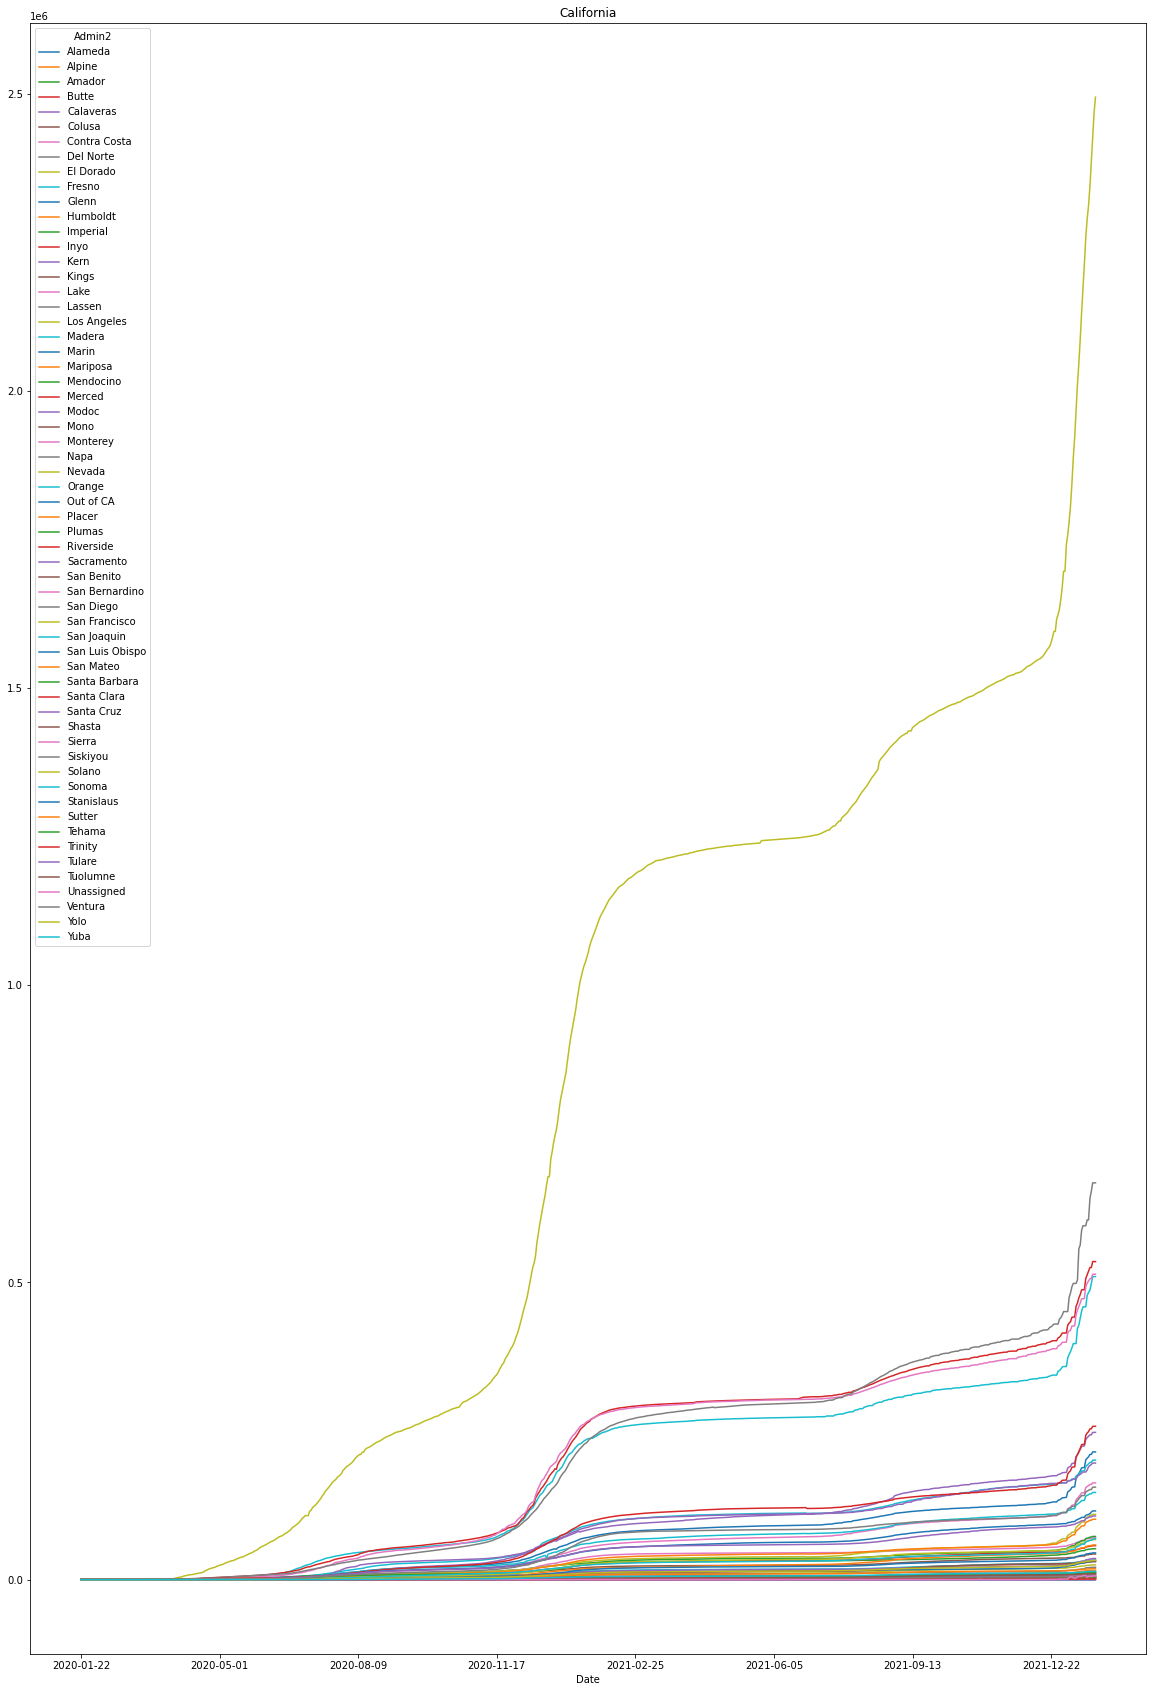

In [14]:
dframe.plot(title=('California'),figsize=(20,30))

In [15]:
dframe.describe()

Admin2,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,Del Norte,El Dorado,Fresno,...,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Unassigned,Ventura,Yolo,Yuba
count,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,...,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000
mean,60842.152797,53.836289,2442.053206,10174.124147,1613.555252,1502.386085,48322.328786,1220.331514,7512.743520,73594.620737,...,41747.739427,6491.267394,3965.335607,336.976808,39856.060027,2951.302865,197.937244,51926.725784,9755.301501,4402.421555
std,50409.577676,44.408596,2227.849231,9273.610839,1598.259197,1228.856630,40732.767860,1367.066898,7003.451382,58549.151892,...,33479.115843,5548.406099,3708.721617,350.311061,31369.731345,2855.023250,875.364334,43600.995319,8371.571187,3986.188410
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9963.000000,2.000000,61.000000,737.000000,102.000000,242.000000,6642.000000,66.000000,491.000000,12317.000000,...,7614.000000,570.000000,160.000000,8.000000,7923.000000,95.000000,0.000000,6326.000000,1282.000000,297.000000
50%,71260.000000,73.000000,3066.000000,11156.000000,1682.000000,1860.000000,54838.000000,856.000000,8438.000000,91602.000000,...,48171.000000,7959.000000,4451.000000,314.000000,48765.000000,3408.000000,0.000000,66822.000000,11158.000000,4853.000000
75%,95429.000000,89.000000,3850.000000,15010.000000,2283.000000,2339.000000,75209.000000,1512.000000,11636.000000,112901.000000,...,64281.000000,9996.000000,5784.000000,444.000000,59911.000000,4258.000000,66.000000,86148.000000,15016.000000,6590.000000
max,214939.000000,119.000000,7064.000000,32484.000000,6006.000000,3840.000000,162809.000000,4368.000000,24845.000000,201080.000000,...,115652.000000,18472.000000,12228.000000,1167.000000,107113.000000,9979.000000,7153.000000,155655.000000,32382.000000,14050.000000


In [16]:
dframe.columns

Index(['Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn', 'Humboldt',
       'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen', 'Los Angeles',
       'Madera', 'Marin', 'Mariposa', 'Mendocino', 'Merced', 'Modoc', 'Mono',
       'Monterey', 'Napa', 'Nevada', 'Orange', 'Out of CA', 'Placer', 'Plumas',
       'Riverside', 'Sacramento', 'San Benito', 'San Bernardino', 'San Diego',
       'San Francisco', 'San Joaquin', 'San Luis Obispo', 'San Mateo',
       'Santa Barbara', 'Santa Clara', 'Santa Cruz', 'Shasta', 'Sierra',
       'Siskiyou', 'Solano', 'Sonoma', 'Stanislaus', 'Sutter', 'Tehama',
       'Trinity', 'Tulare', 'Tuolumne', 'Unassigned', 'Ventura', 'Yolo',
       'Yuba'],
      dtype='object', name='Admin2')

<AxesSubplot:title={'center':'California'}, ylabel='Frequency'>

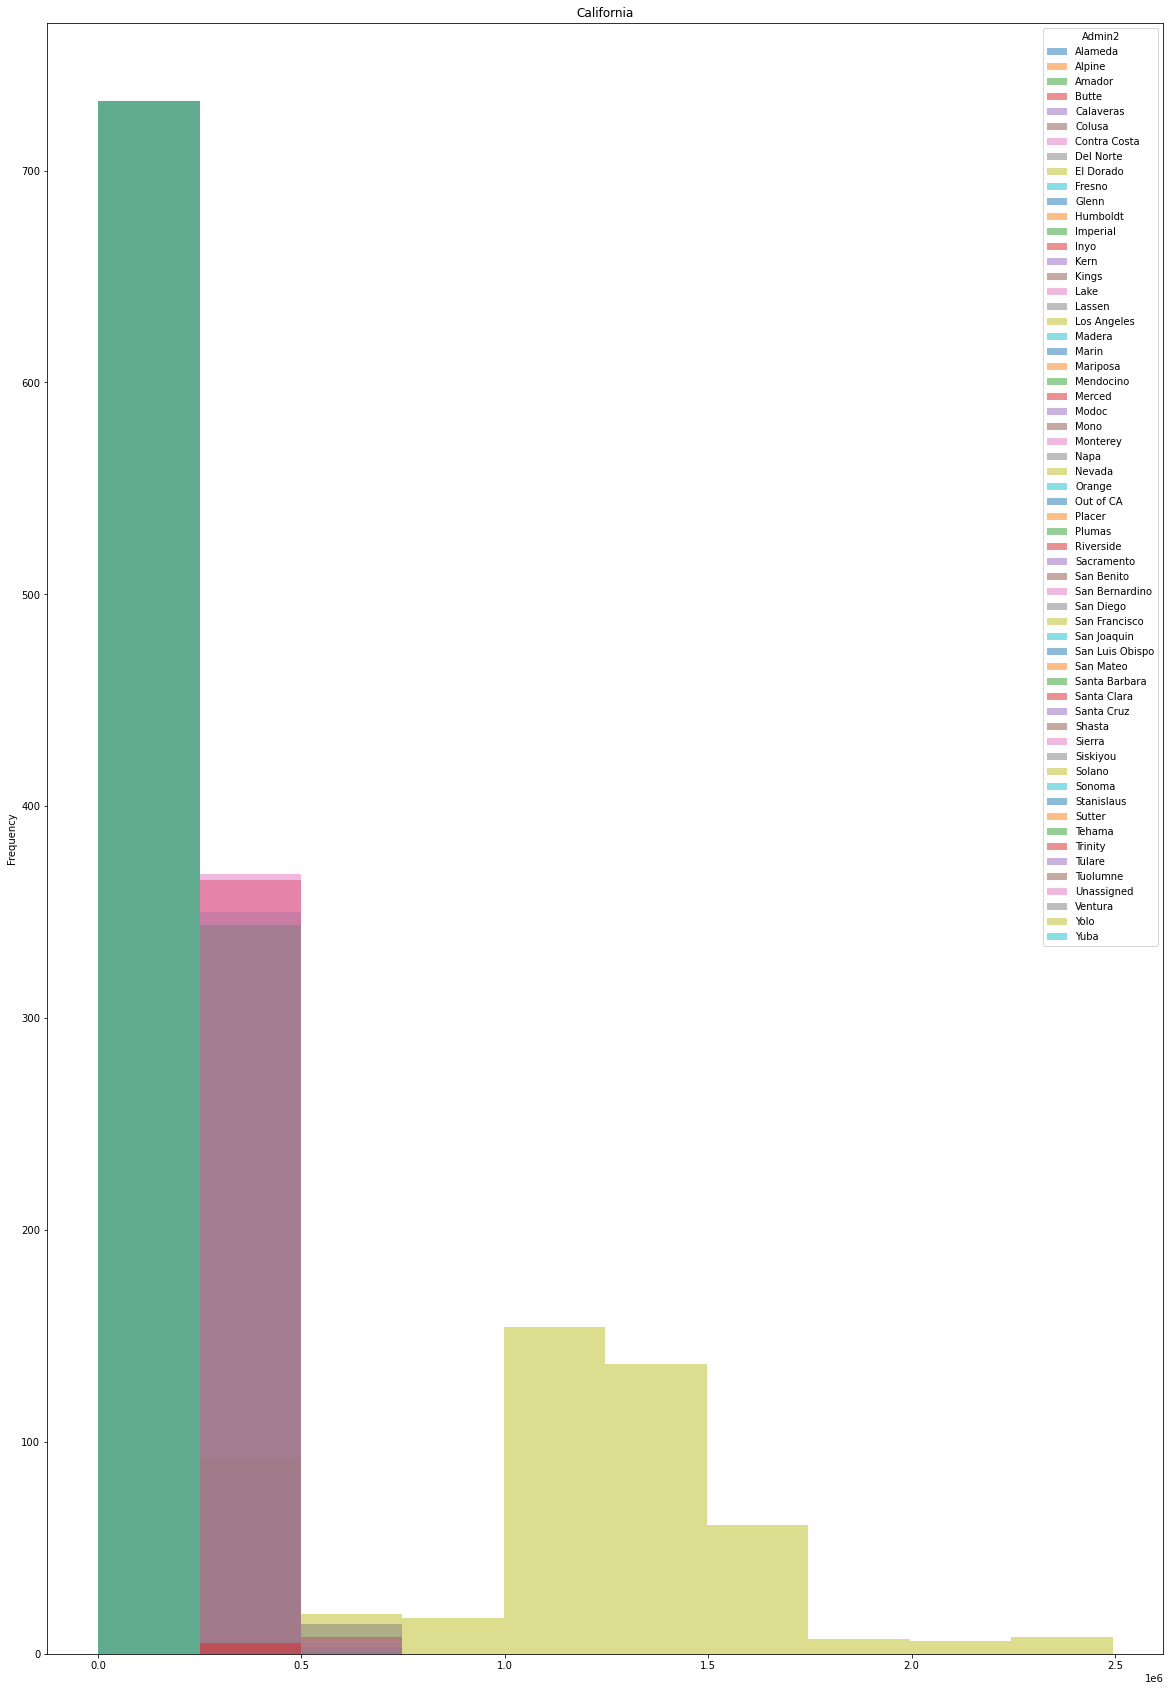

In [17]:
dframe.plot.hist(title=('California'),figsize=(20,30), alpha=0.5)

**So everyone has a bunch of days where ther are 0 outbdreaks, but only a few have 0.5x10^6 or 500,000 cases.  Only two counties have more than a million cases.** 

In [18]:
California_Counties=[]
for i in dframe.columns:
    California_Counties.append(dframe[i])
dframe_Cal=DataFrame(California_Counties)    

In [19]:
dframe_Cal

Date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-01-14,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23
Alameda,0,0,0,0,0,0,0,0,0,0,...,188451,188518,201500,204284,206736,210747,210751,214939,214939,214939
Alpine,0,0,0,0,0,0,0,0,0,0,...,117,117,117,118,118,118,119,119,119,119
Amador,0,0,0,0,0,0,0,0,0,0,...,6651,6651,6835,6859,6910,7008,7008,7064,7064,7064
Butte,0,0,0,0,0,0,0,0,0,0,...,30209,30223,31355,31551,31763,32088,32091,32484,32484,32484
Calaveras,0,0,0,0,0,0,0,0,0,0,...,5424,5426,5705,5754,5855,5936,5936,6006,6006,6006
Colusa,0,0,0,0,0,0,0,0,0,0,...,3682,3682,3772,3791,3789,3824,3824,3840,3840,3840
Contra Costa,0,0,0,0,0,0,0,0,0,0,...,146207,146257,154961,156689,158142,160239,160241,162809,162809,162809
Del Norte,0,0,0,0,0,0,0,0,0,0,...,4155,4157,4272,4308,4328,4339,4339,4368,4368,4368
El Dorado,0,0,0,0,0,0,0,0,0,0,...,22949,22963,23847,24102,24279,24525,24525,24845,24845,24845
Fresno,0,0,0,0,0,0,0,0,0,0,...,182959,182992,190467,192746,194709,197313,197314,201080,201080,201080


<AxesSubplot:>

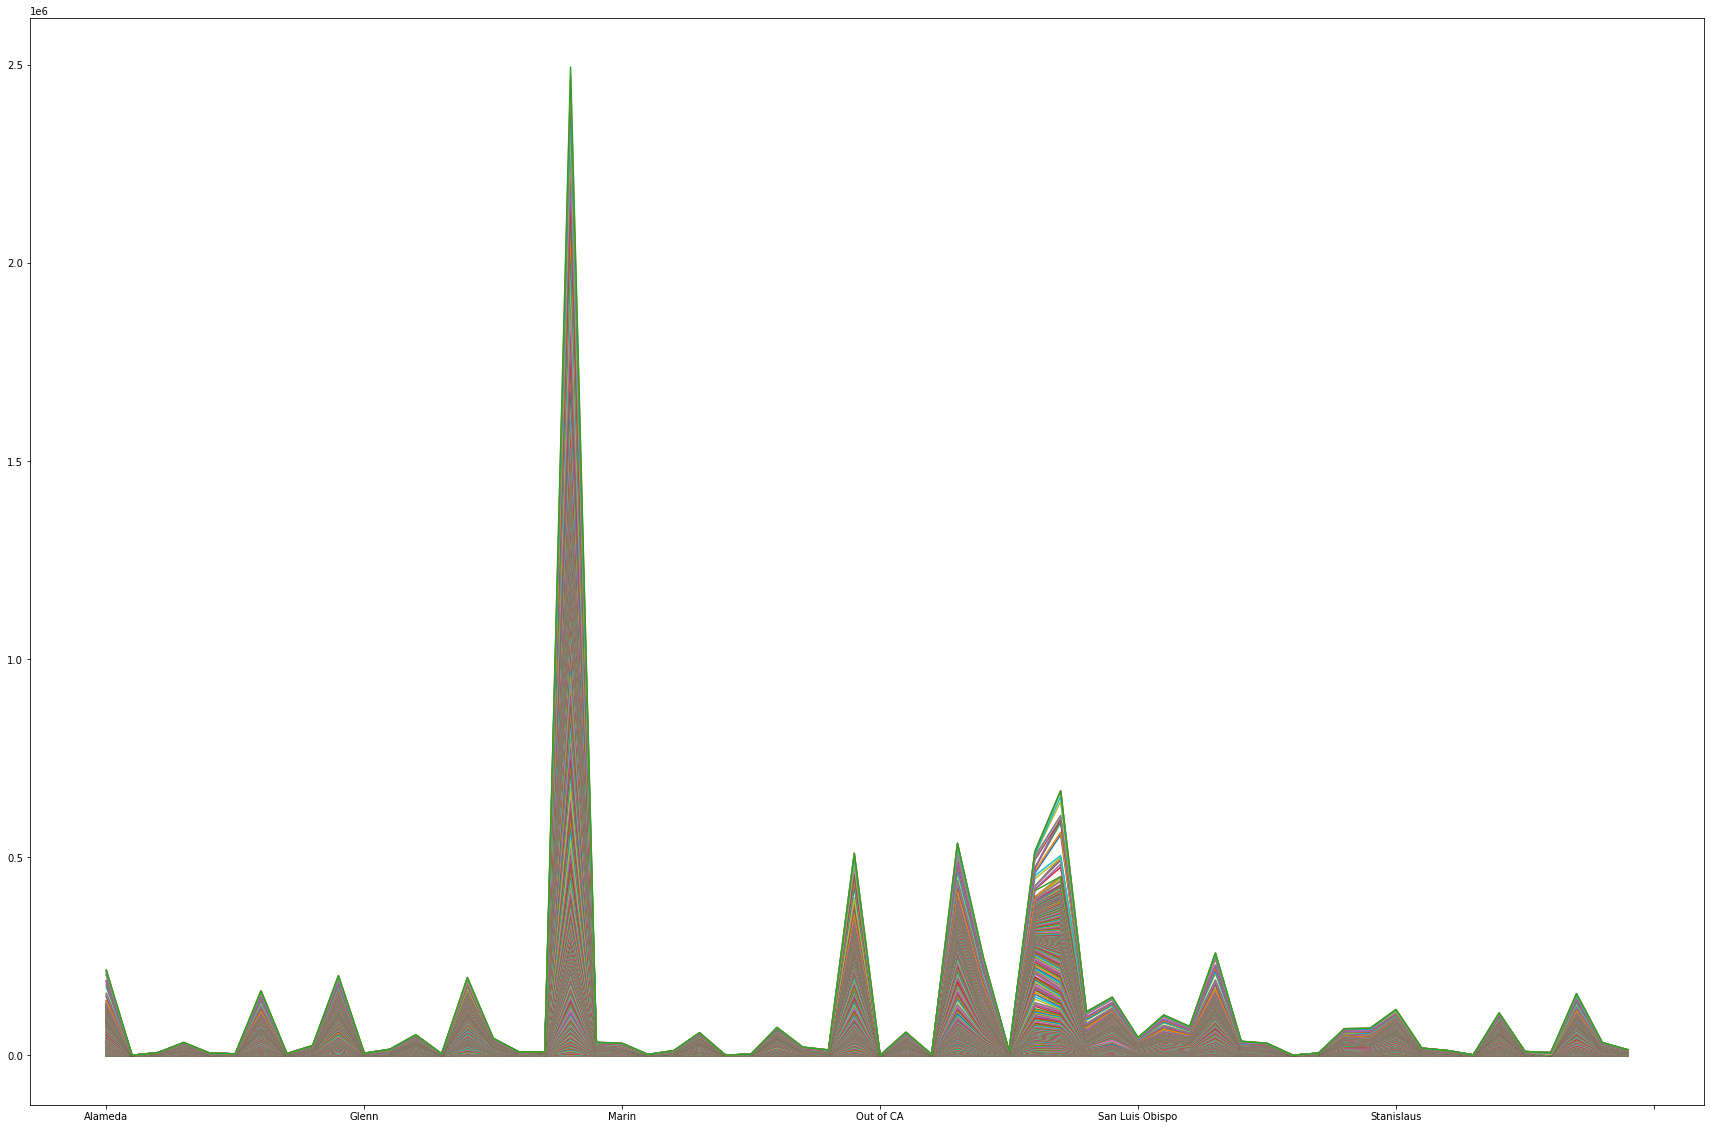

In [20]:
dframe_Cal.plot(figsize=(30,20),legend=False)

<AxesSubplot:>

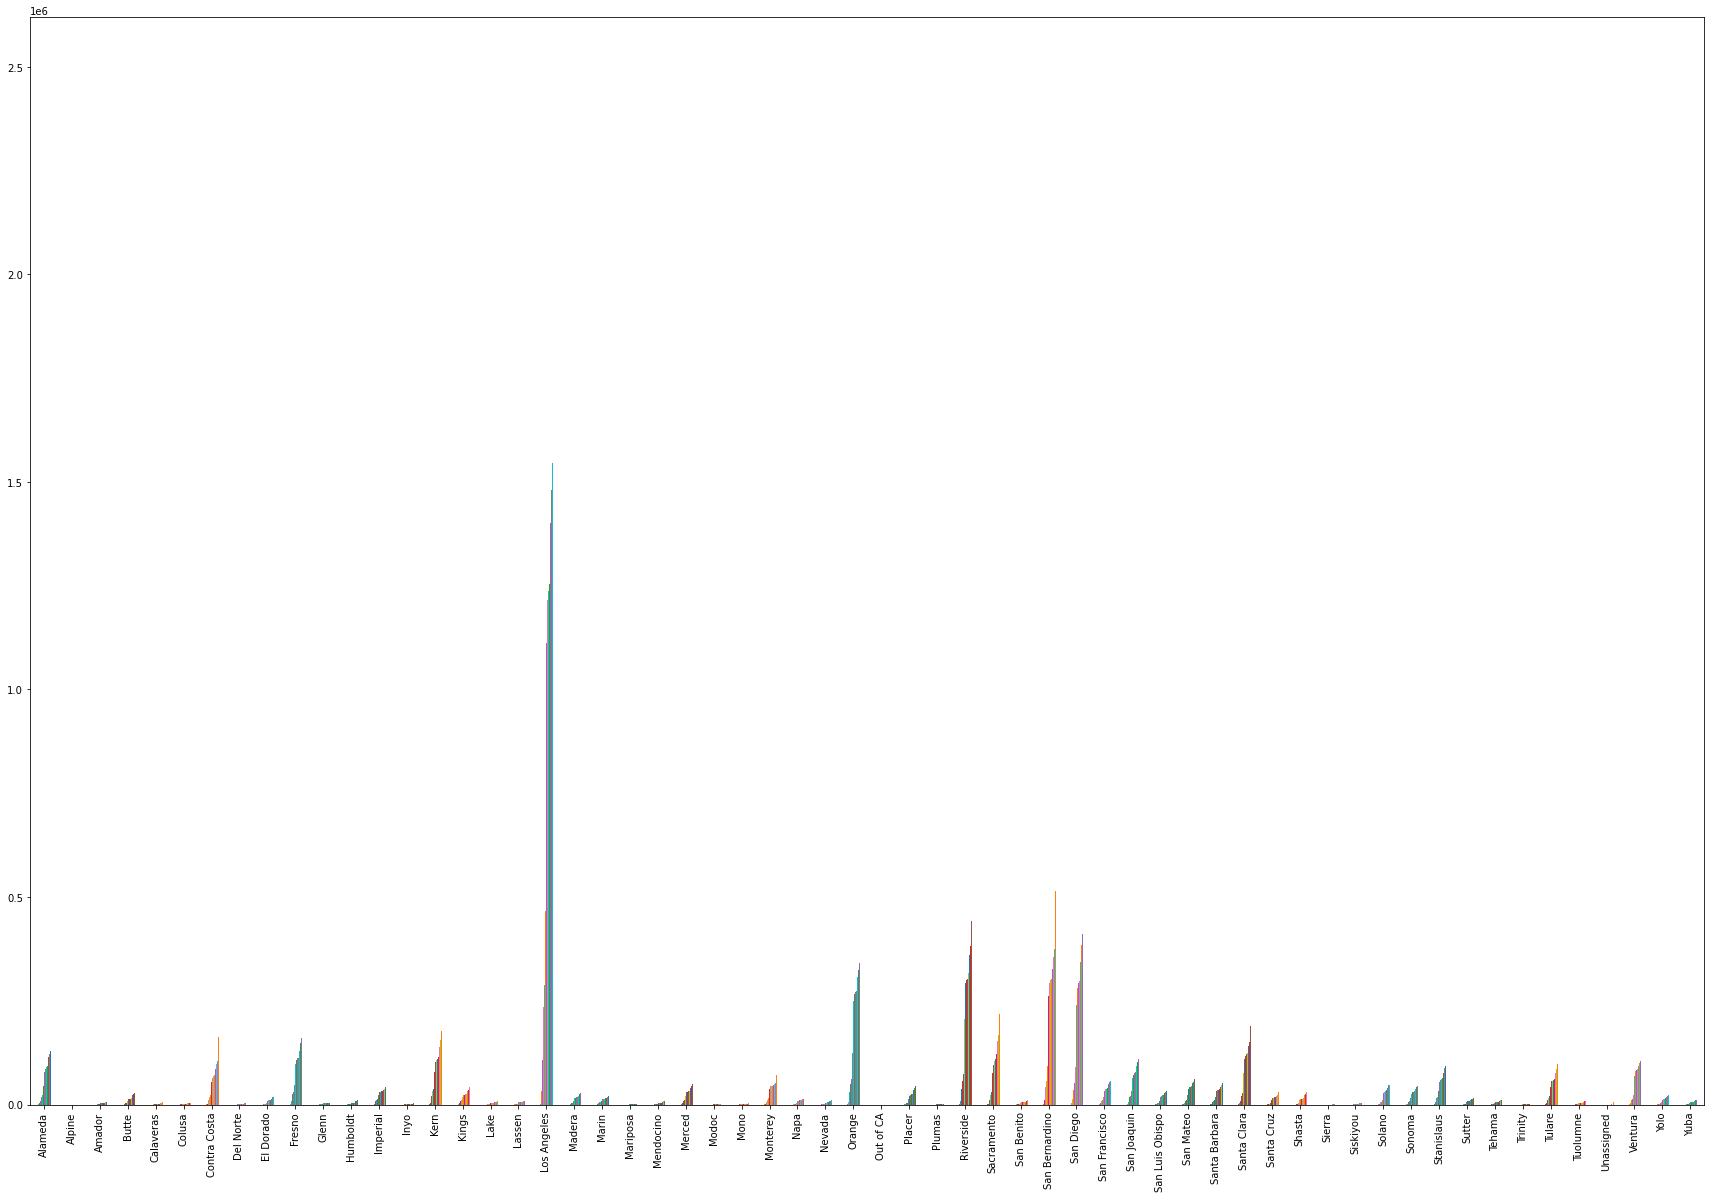

In [21]:
dframe_Cal.plot.bar(figsize=(30,20),legend=False)

**Cases in CA are as follows**

LA is the worst by a factor of almost four!

Second tier would be Riverside, San Diego, San Bernadino and Orange county.  (high populations in SoCal)

Alameda, Conta Costa and Santa Clara along with Fresno are in the third tier (high populations in NorCal)

I should look at this per capita and see how it works via population density.  I'm pretty sure LA county is the largest in the state so no surprise.  SF is a small but dense population, that could be why it's so low, also SF has had very strict policies and good general adherance to them.

In [22]:
# Lets make a funciton that will do this for any state
def State_by_county(df,state):
    ''' This function will take a database and make a data frame of the state cases per county by date'''
    State=df[df['Province/State']==state]
    # Indexes the data by Admin2 (aka cities) and Dates
    #This unstacks the cities into their own hirerarchy
    dframe=State.set_index(['Admin2','Date']).unstack('Admin2')['Case']
    Counties=[]
    for i in dframe.columns:
        Counties.append(dframe[i])
    return DataFrame(Counties)

In [23]:
State_by_county(us_confirmed,'California')

Date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-01-14,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23
Alameda,0,0,0,0,0,0,0,0,0,0,...,188451,188518,201500,204284,206736,210747,210751,214939,214939,214939
Alpine,0,0,0,0,0,0,0,0,0,0,...,117,117,117,118,118,118,119,119,119,119
Amador,0,0,0,0,0,0,0,0,0,0,...,6651,6651,6835,6859,6910,7008,7008,7064,7064,7064
Butte,0,0,0,0,0,0,0,0,0,0,...,30209,30223,31355,31551,31763,32088,32091,32484,32484,32484
Calaveras,0,0,0,0,0,0,0,0,0,0,...,5424,5426,5705,5754,5855,5936,5936,6006,6006,6006
Colusa,0,0,0,0,0,0,0,0,0,0,...,3682,3682,3772,3791,3789,3824,3824,3840,3840,3840
Contra Costa,0,0,0,0,0,0,0,0,0,0,...,146207,146257,154961,156689,158142,160239,160241,162809,162809,162809
Del Norte,0,0,0,0,0,0,0,0,0,0,...,4155,4157,4272,4308,4328,4339,4339,4368,4368,4368
El Dorado,0,0,0,0,0,0,0,0,0,0,...,22949,22963,23847,24102,24279,24525,24525,24845,24845,24845
Fresno,0,0,0,0,0,0,0,0,0,0,...,182959,182992,190467,192746,194709,197313,197314,201080,201080,201080


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

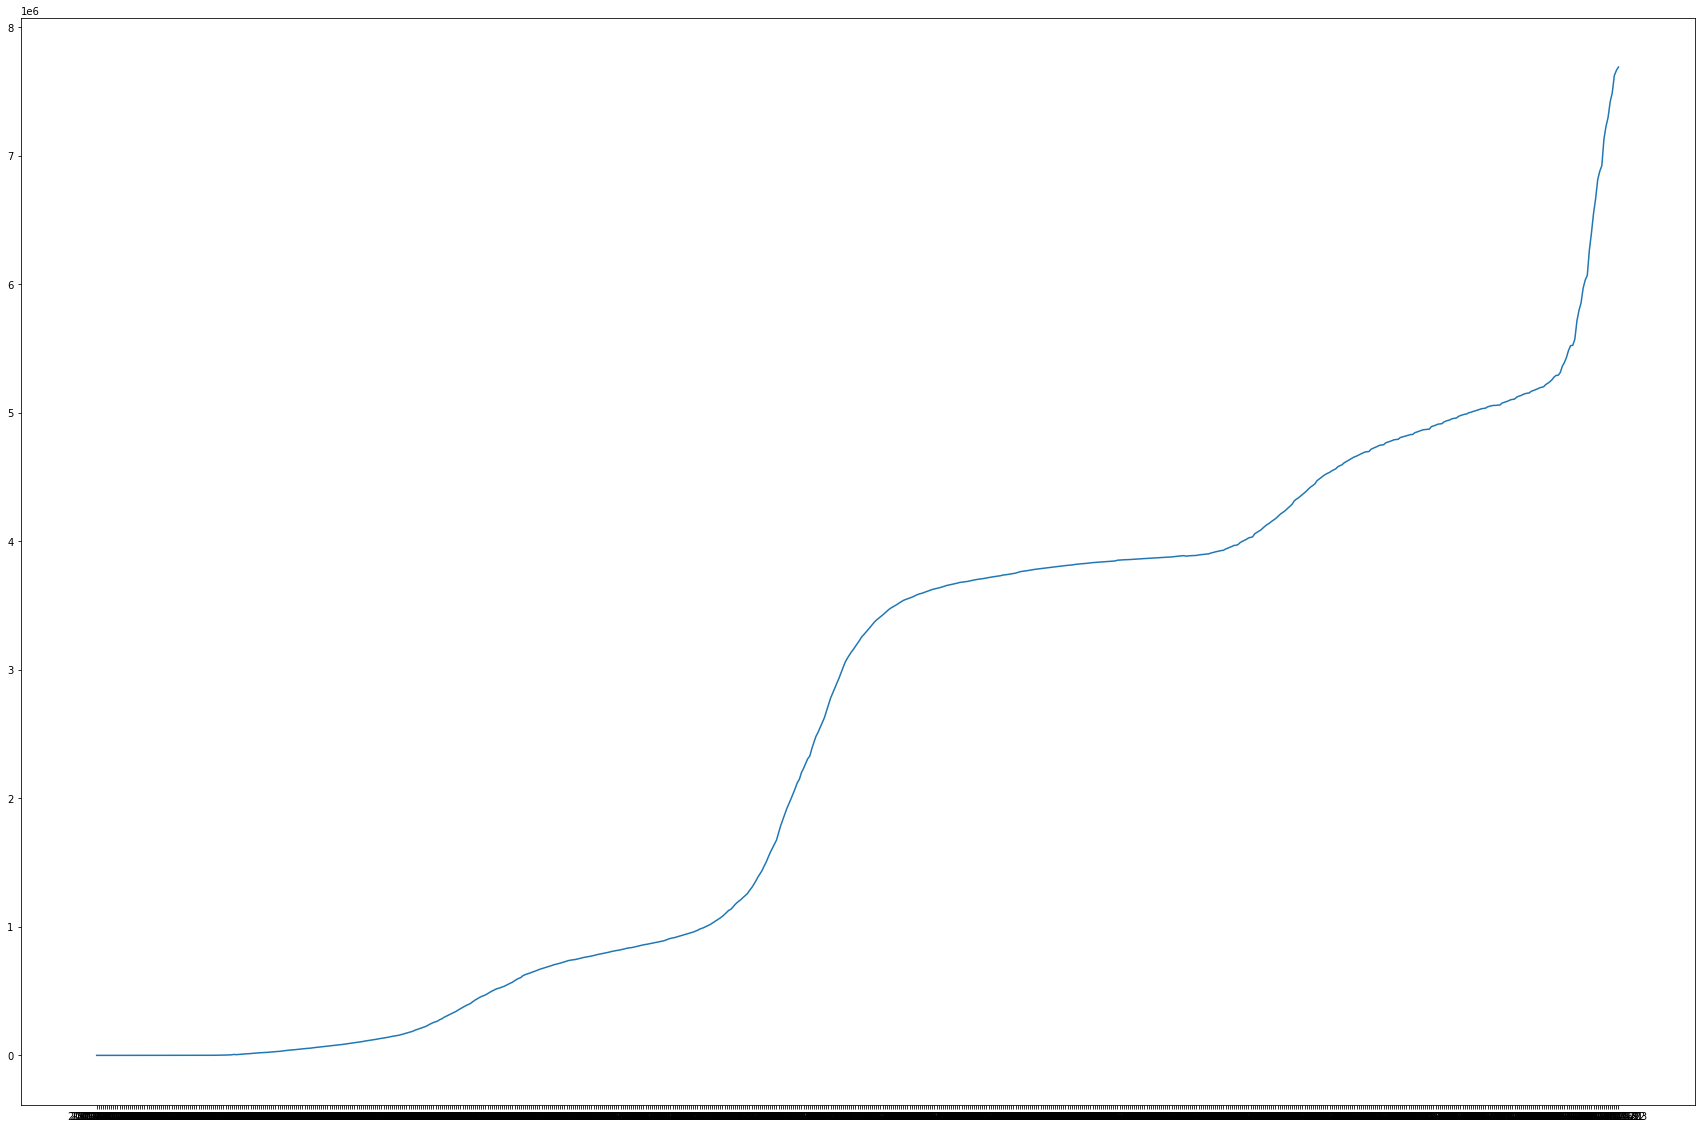

In [25]:
plt.figure(figsize=(30,20))
plt.plot(dframe_Cal.sum())

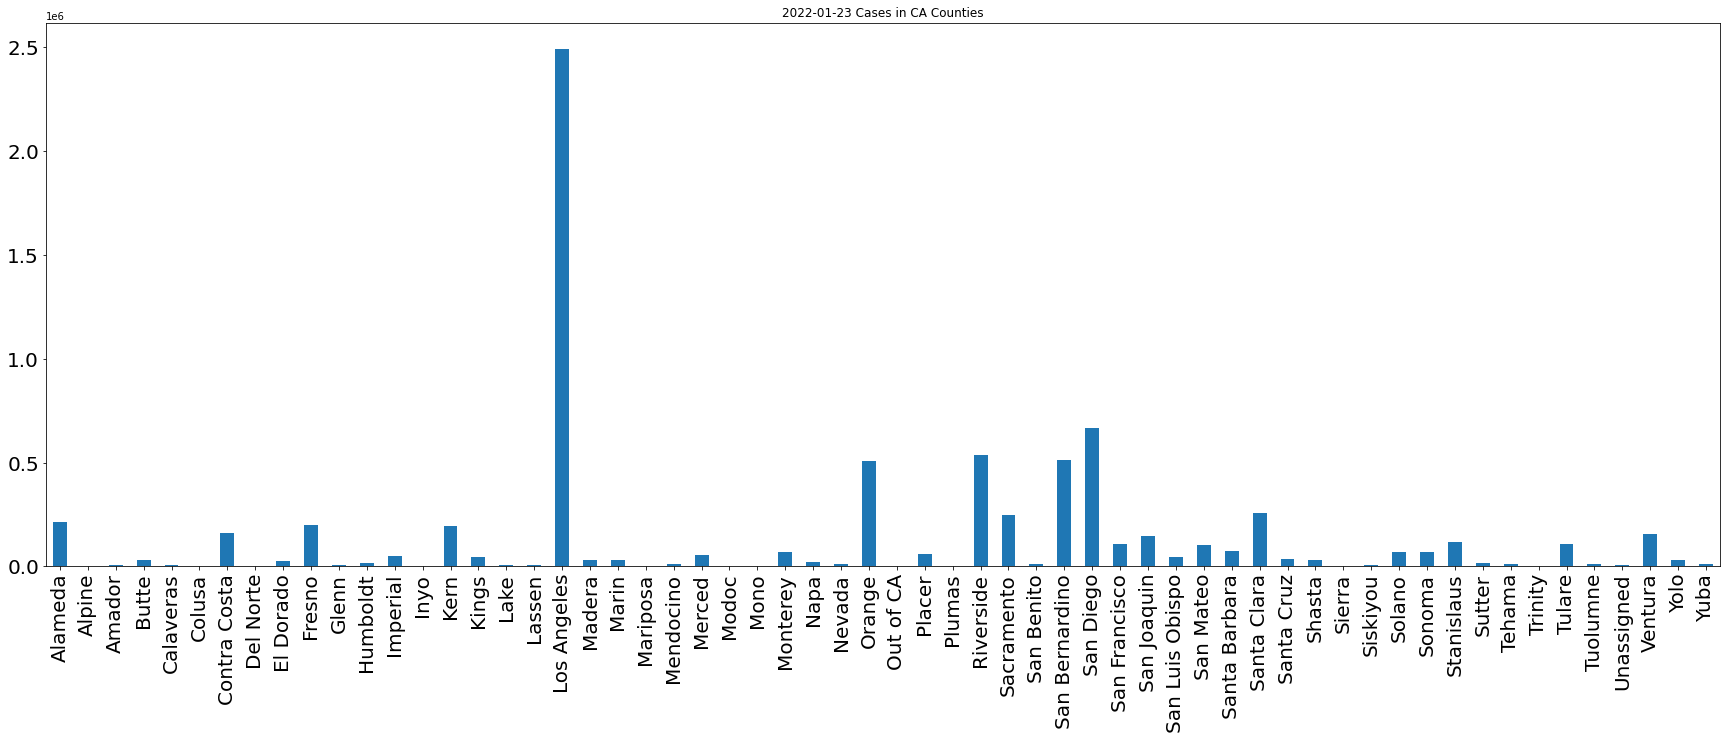

In [26]:
fig_1=dframe_Cal['2022-01-23'].plot.bar(title='2022-01-23 Cases in CA Counties',figsize=(30,10),fontsize=20)

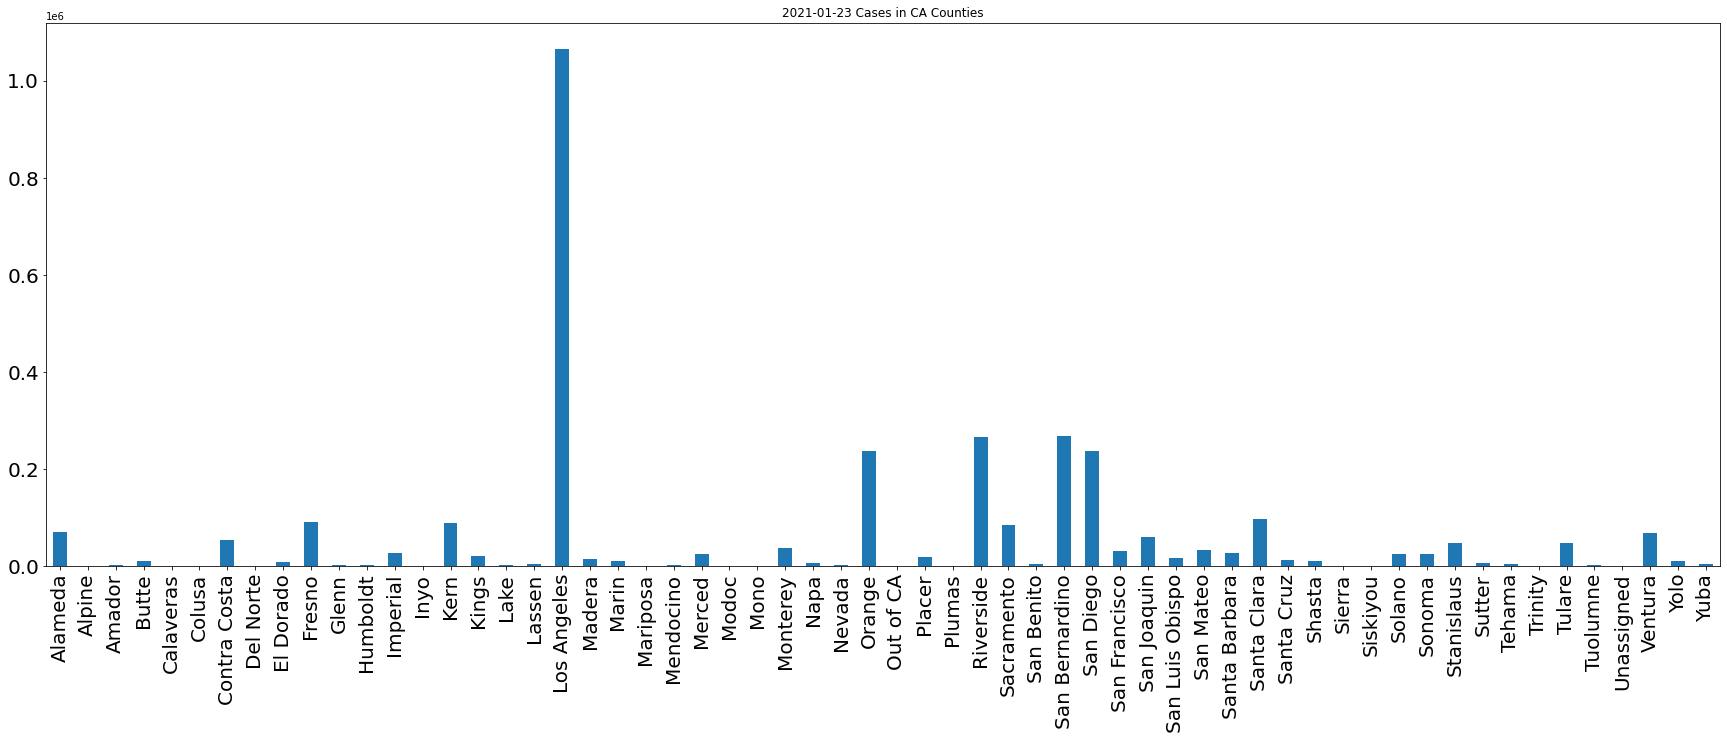

In [27]:
fig_2=dframe_Cal['2021-01-23'].plot.bar(title='2021-01-23 Cases in CA Counties',figsize=(30,10),fontsize=20)

<AxesSubplot:title={'center':'Diff 2021-01-23 to 2022-01-23 Cases in CA Counties'}>

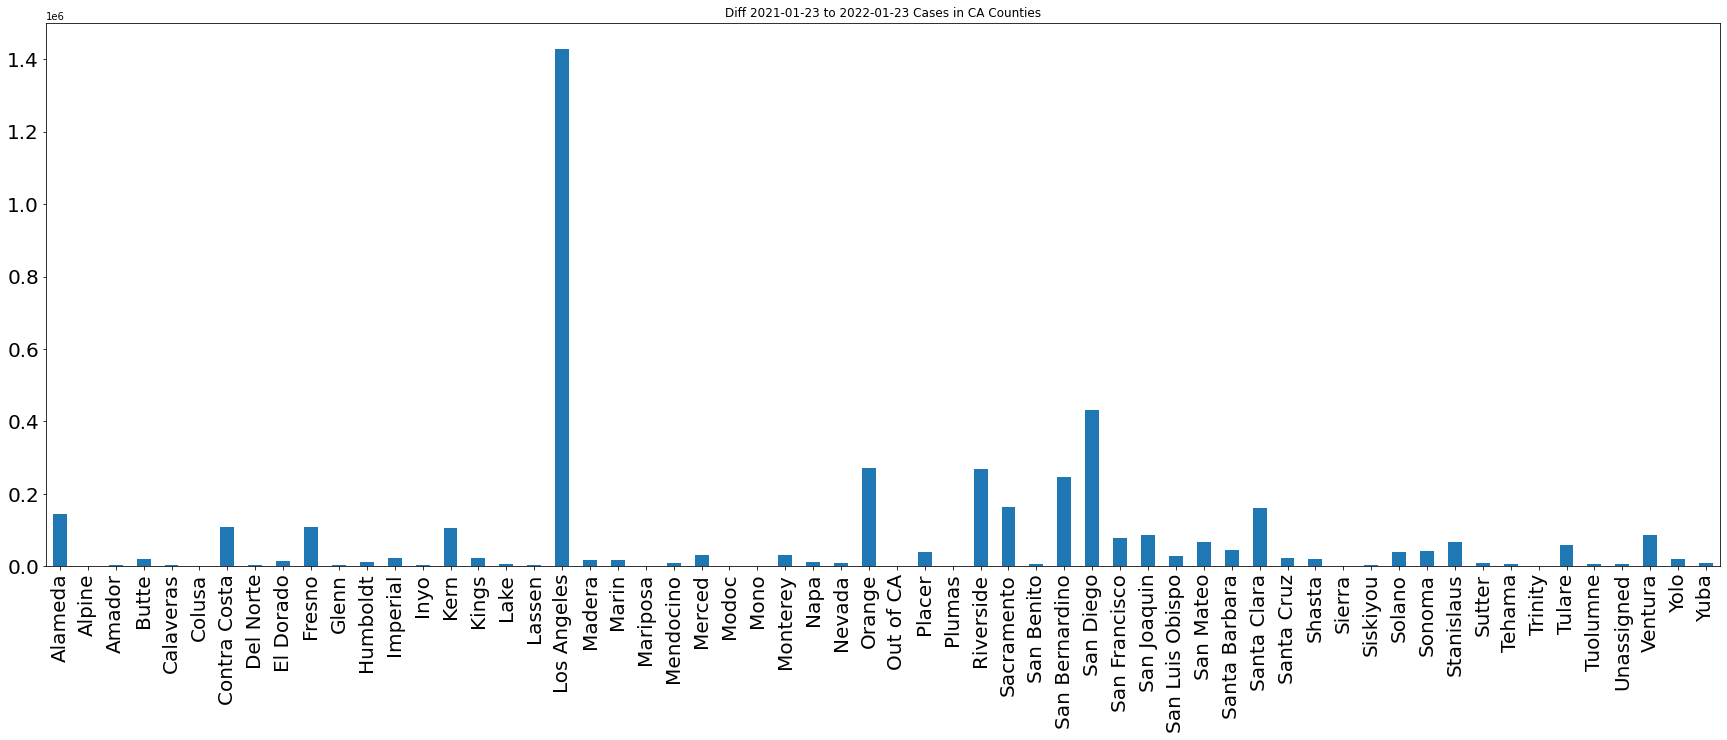

In [28]:
fig2=dframe_Cal['2022-01-23']-dframe_Cal['2021-01-23']
DataFrame(fig2).plot.bar(title='Diff 2021-01-23 to 2022-01-23 Cases in CA Counties',figsize=(30,10),legend=False,fontsize=20)

<AxesSubplot:title={'center':'Fold increase 2021-01-23 to 2022-01-23 Cases in CA Counties'}>

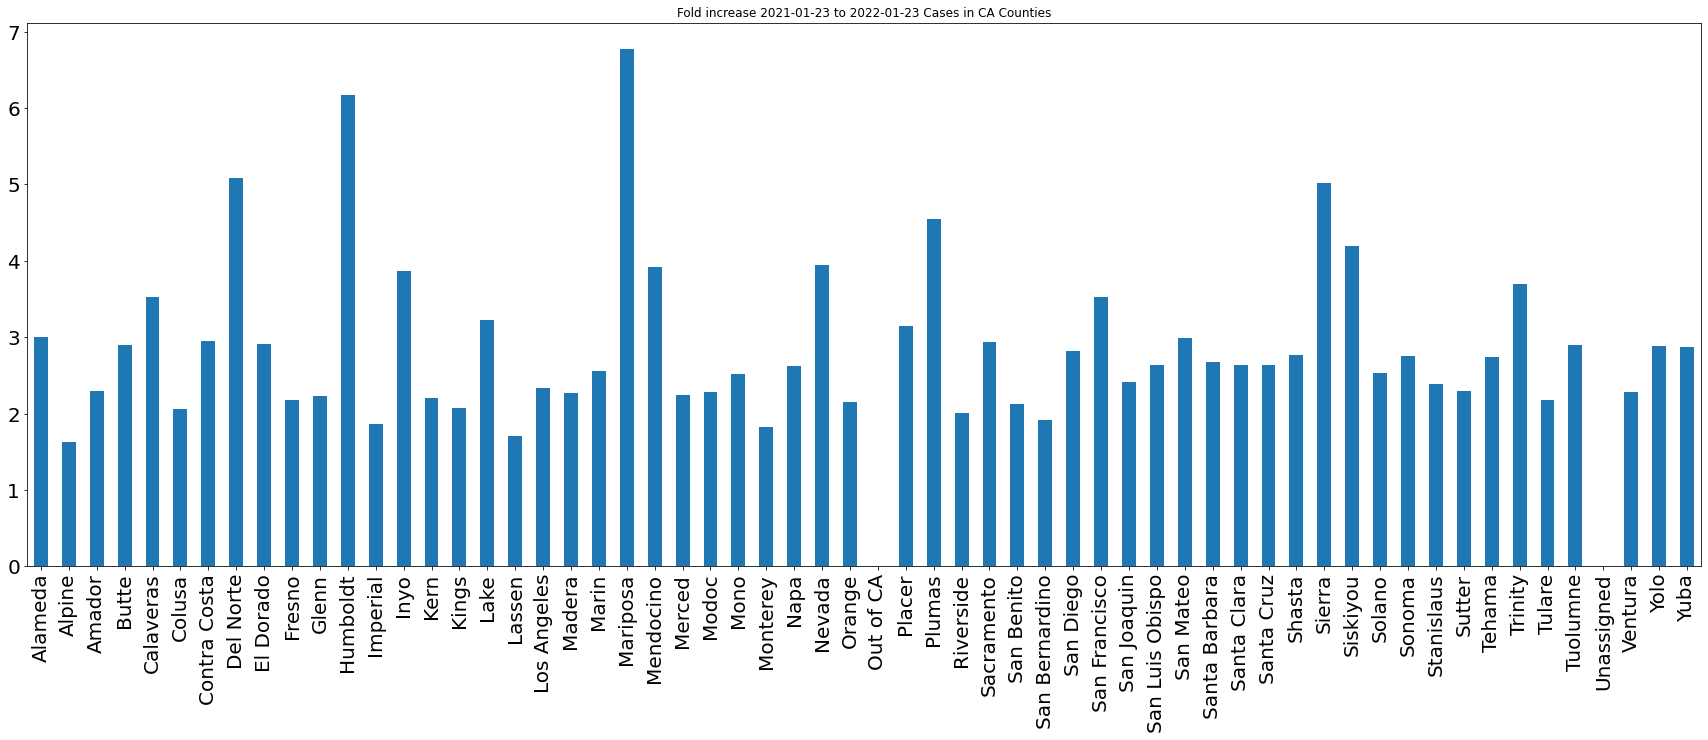

In [29]:
fig3=dframe_Cal['2022-01-23']/dframe_Cal['2021-01-23']
DataFrame(fig3).plot.bar(title='Fold increase 2021-01-23 to 2022-01-23 Cases in CA Counties',figsize=(30,10),legend=False,fontsize=20)

In [33]:
states=set(us_confirmed['Province/State'])
#states

In [34]:
dates=set(us_confirmed['Date'])
#dates

In [35]:
dframe1=DataFrame(np.arange(len(states)),states)
dframe1

,0
New Jersey,0
New York,1
South Carolina,2
Indiana,3
Grand Princess,4
Utah,5
Massachusetts,6
Maryland,7
Montana,8
Ohio,9


In [36]:
dframe2=DataFrame(np.arange(len(dates)),dates).sort_index()
dframe2

,0
2020-01-22,636
2020-01-23,8
2020-01-24,421
2020-01-25,234
2020-01-26,354
...,...
2022-01-19,100
2022-01-20,360
2022-01-21,428
2022-01-22,287


In [37]:
us_confirmed

,Unnamed: 0,Admin2,Date,Case,Country/Region,Province/State
0,0,Autauga,2020-01-22,0,US,Alabama
1,1,Autauga,2020-01-23,0,US,Alabama
2,2,Autauga,2020-01-24,0,US,Alabama
3,3,Autauga,2020-01-25,0,US,Alabama
4,4,Autauga,2020-01-26,0,US,Alabama
...,...,...,...,...,...,...
2449681,2449681,Weston,2022-01-19,1332,US,Wyoming
2449682,2449682,Weston,2022-01-20,1341,US,Wyoming
2449683,2449683,Weston,2022-01-21,1349,US,Wyoming
2449684,2449684,Weston,2022-01-22,1349,US,Wyoming


In [38]:
us_confirmed.set_index('Unnamed: 0', inplace=True)

In [39]:
States_confirmed=[]
for state in states:
    States_confirmed.append (us_confirmed[us_confirmed['Province/State']==state])
#States_confirmed

In [40]:
pd.DataFrame(States_confirmed)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\internals\construction.py:540: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


,0
0,Admin2 Date Case Countr...
1,Admin2 Date Case Country/R...
2,Admin2 Date Case Count...
3,Admin2 Date Case Country/...
4,Admin2 Date Case Country/Re...
5,Admin2 Date Case Co...
6,Admin2 Date Case Cou...
7,Admin2 Date Case Countr...
8,Admin2 Date Case Cou...
9,Admin2 Date Case Country/...


In [41]:
states

{'Alabama',
 'Alaska',
 'American Samoa',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Diamond Princess',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Grand Princess',
 'Guam',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Northern Mariana Islands',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virgin Islands',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming'}

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

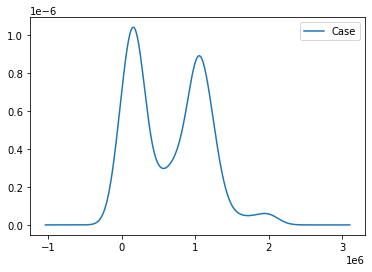

In [42]:
pd.DataFrame(States_confirmed[0]).groupby('Date').sum().plot(kind='density', title=States_confirmed[0])

In [43]:
#Separate each city (aka Admin2) as a different column and show the cases by date
Flor=us_confirmed[us_confirmed['Province/State']=='Florida']
dframe6=Flor.set_index(['Admin2','Date']).unstack('Admin2')['Case']
dframe6

Admin2,Alachua,Baker,Bay,Bradford,Brevard,Broward,Calhoun,Charlotte,Citrus,Clay,...,St. Lucie,Sumter,Suwannee,Taylor,Unassigned,Union,Volusia,Wakulla,Walton,Washington
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19,53902,6802,37964,6062,109128,541334,3368,28664,23830,42246,...,62722,17587,10508,5289,163879,3537,97641,7873,14818,5346
2022-01-20,53902,6802,37964,6062,109128,541334,3368,28664,23830,42246,...,62722,17587,10508,5289,209547,3537,97641,7873,14818,5346
2022-01-21,58853,7417,40734,6517,117094,564397,3595,30627,25432,45799,...,67012,18611,11244,5780,2961,3778,103387,8534,15655,5346


Text(0, 0.5, 'Total No. Cases (in Millions)')

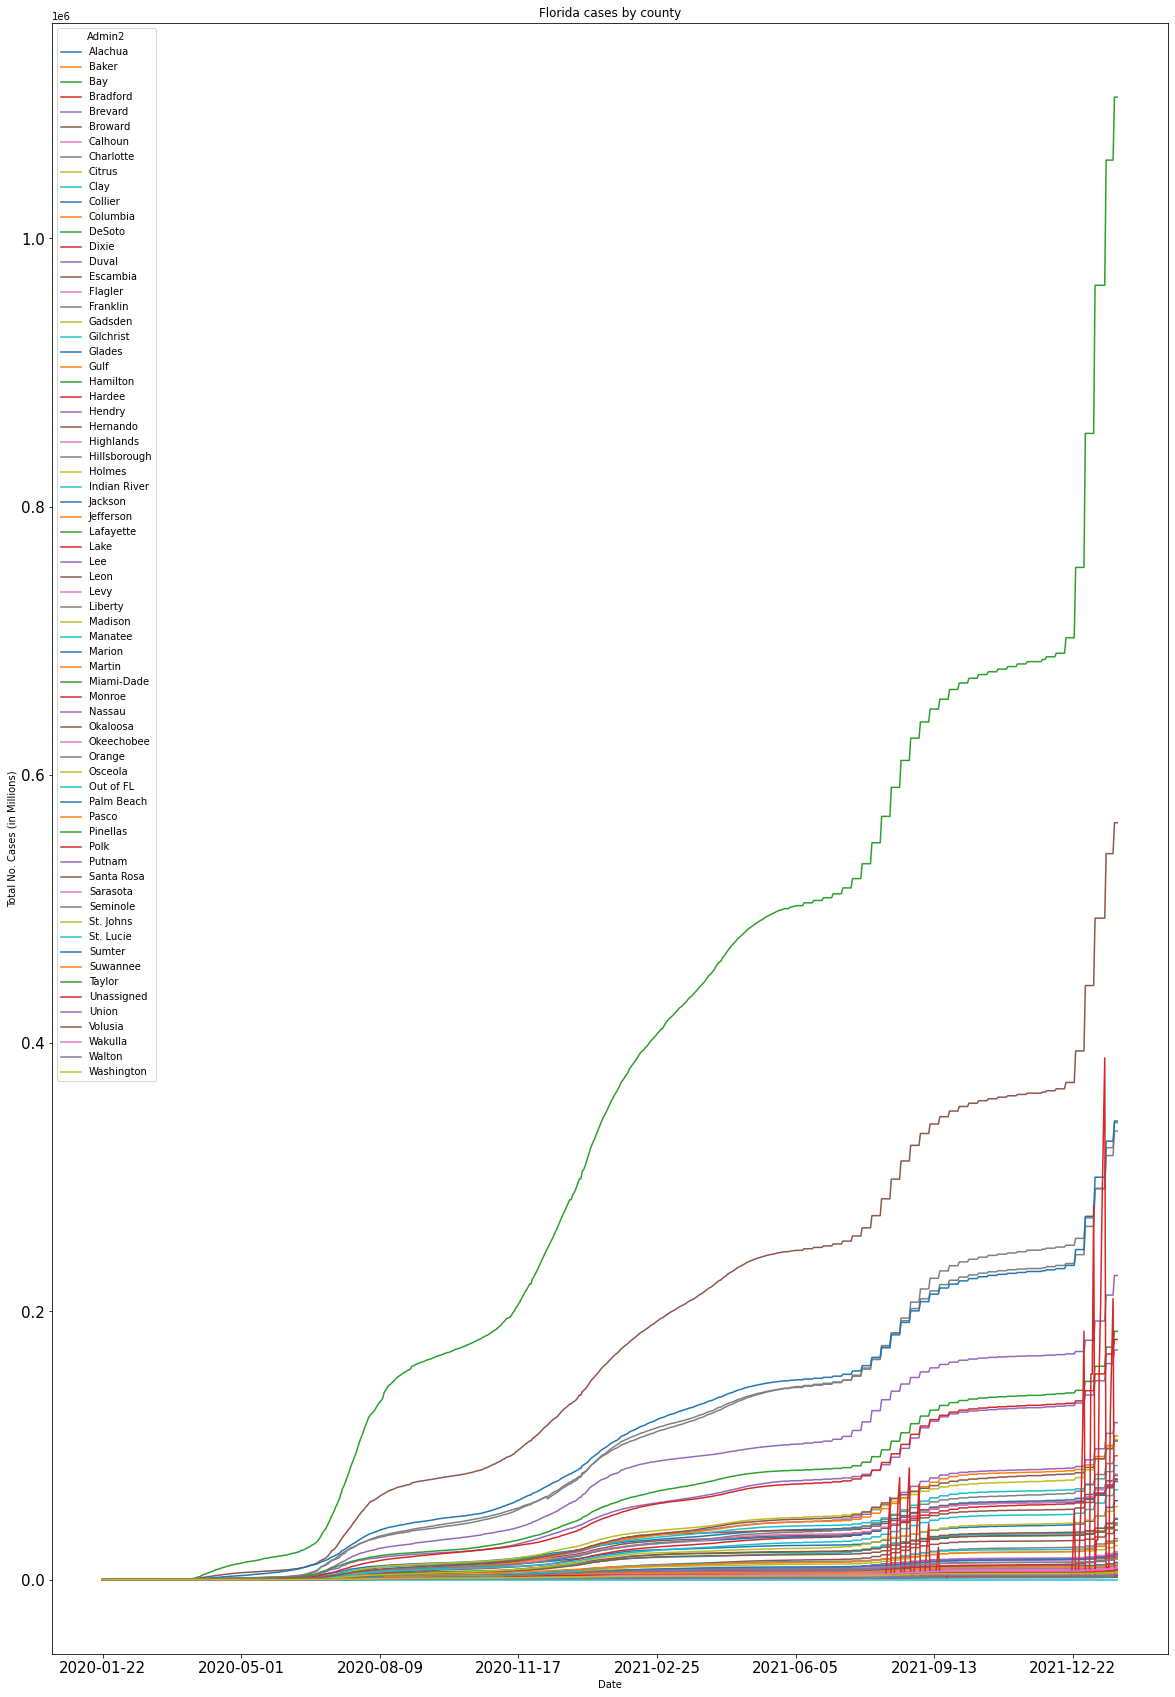

In [44]:
dframe6.plot(title=('Florida cases by county'),figsize=(20,30),fontsize=15)
plt.ylabel('Total No. Cases (in Millions)')

In [45]:
# Pivot the DF so it's by dae instead of by county
Florida_Counties=[]
for i in dframe6.columns:
    Florida_Counties.append(dframe6[i])
dframe_Flor=DataFrame(Florida_Counties)  

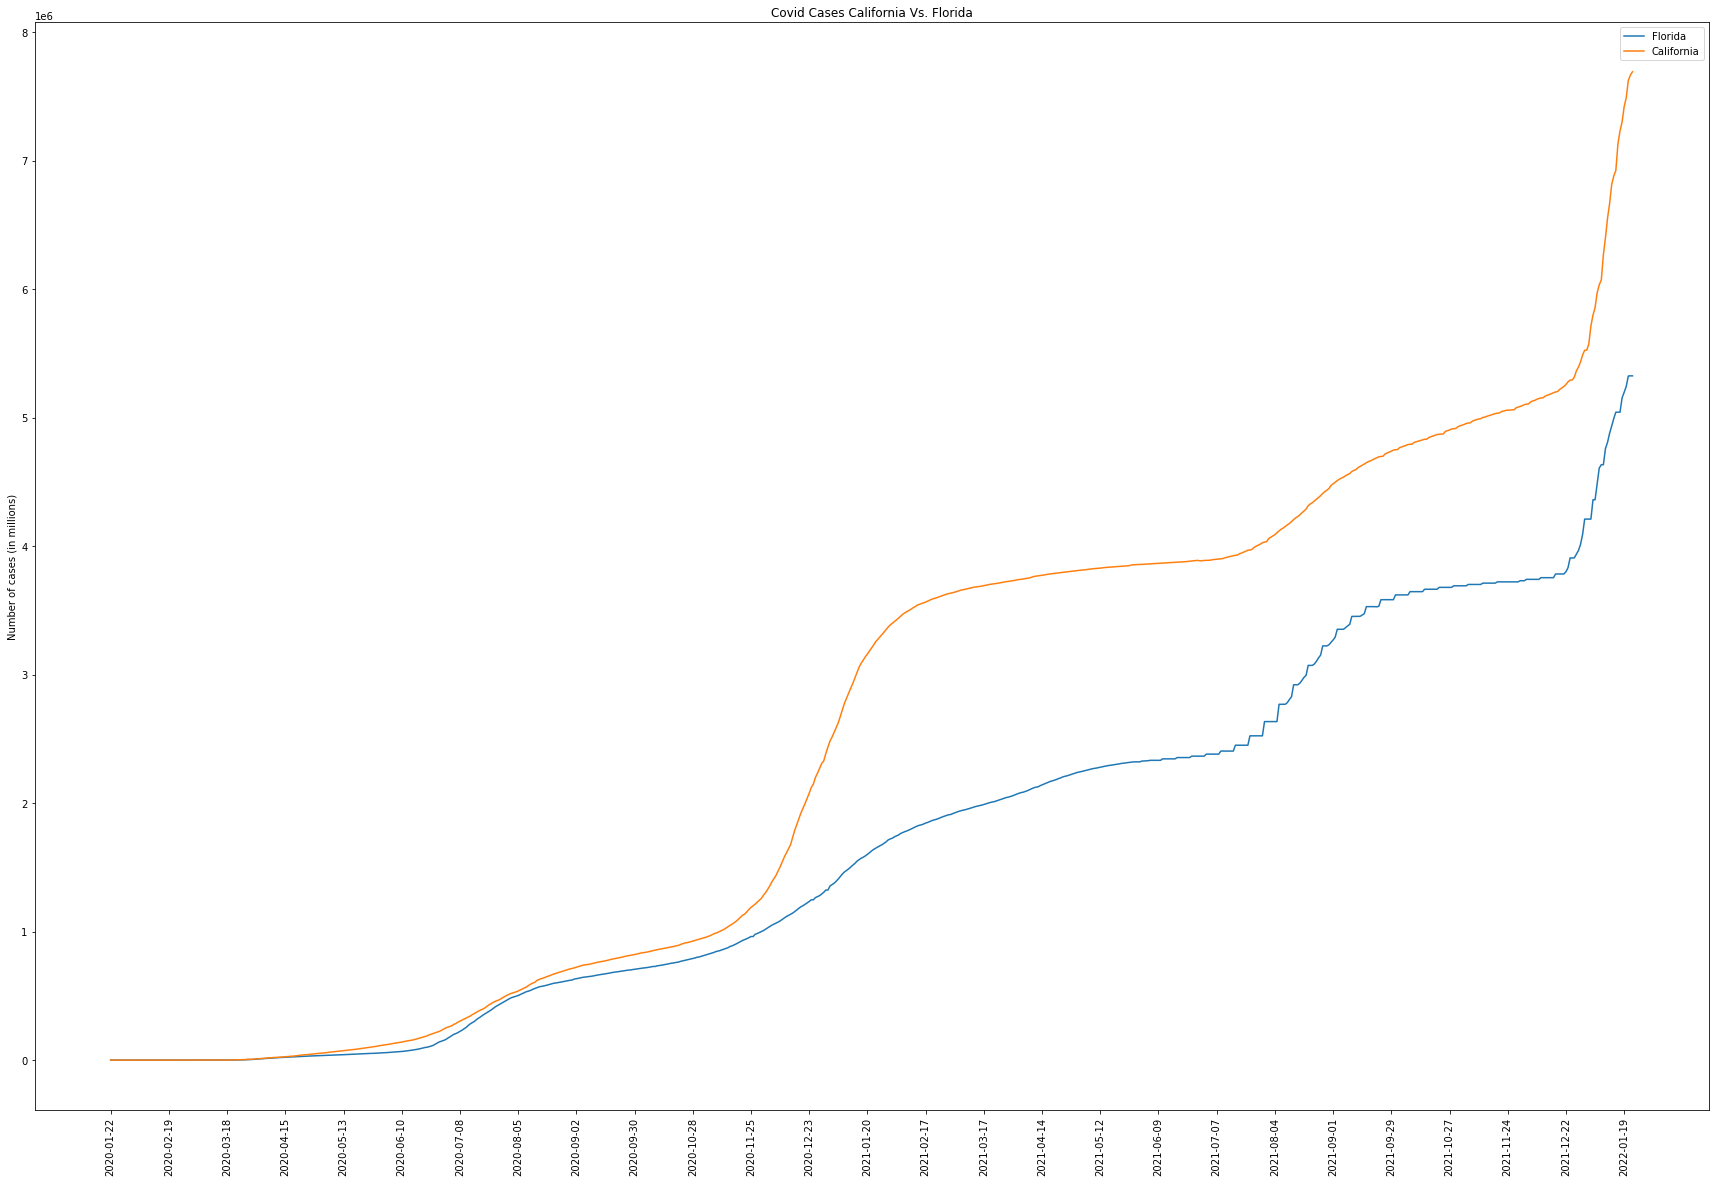

In [46]:
_= plt.figure(figsize=(30,20))
_= plt.title("Covid Cases California Vs. Florida")
_= plt.plot(dframe_Flor.sum(), label='Florida')
_= plt.plot(dframe_Cal.sum(), label='California')
_= plt.ylabel('Number of cases (in millions)')
_= plt.xticks(range(0,len(dates),28) ,rotation=90)
_= plt.legend()
plt.show()

In [48]:
_.figure.savefig('./figures/CA_v_Fl_cases.png')

In [49]:
# Populations per 1000 residents
Cal_pop=39538.223
Flor_pop=21538.187

In [50]:
# per capita calculations for covid cases per 1000 residents
Cal_sum=dframe_Cal.sum()
Flor_sum=dframe_Flor.sum()

Cal_per_Cap = Cal_sum.div(39538.223)
Flor_per_Cap = Flor_sum.div(21538.187)


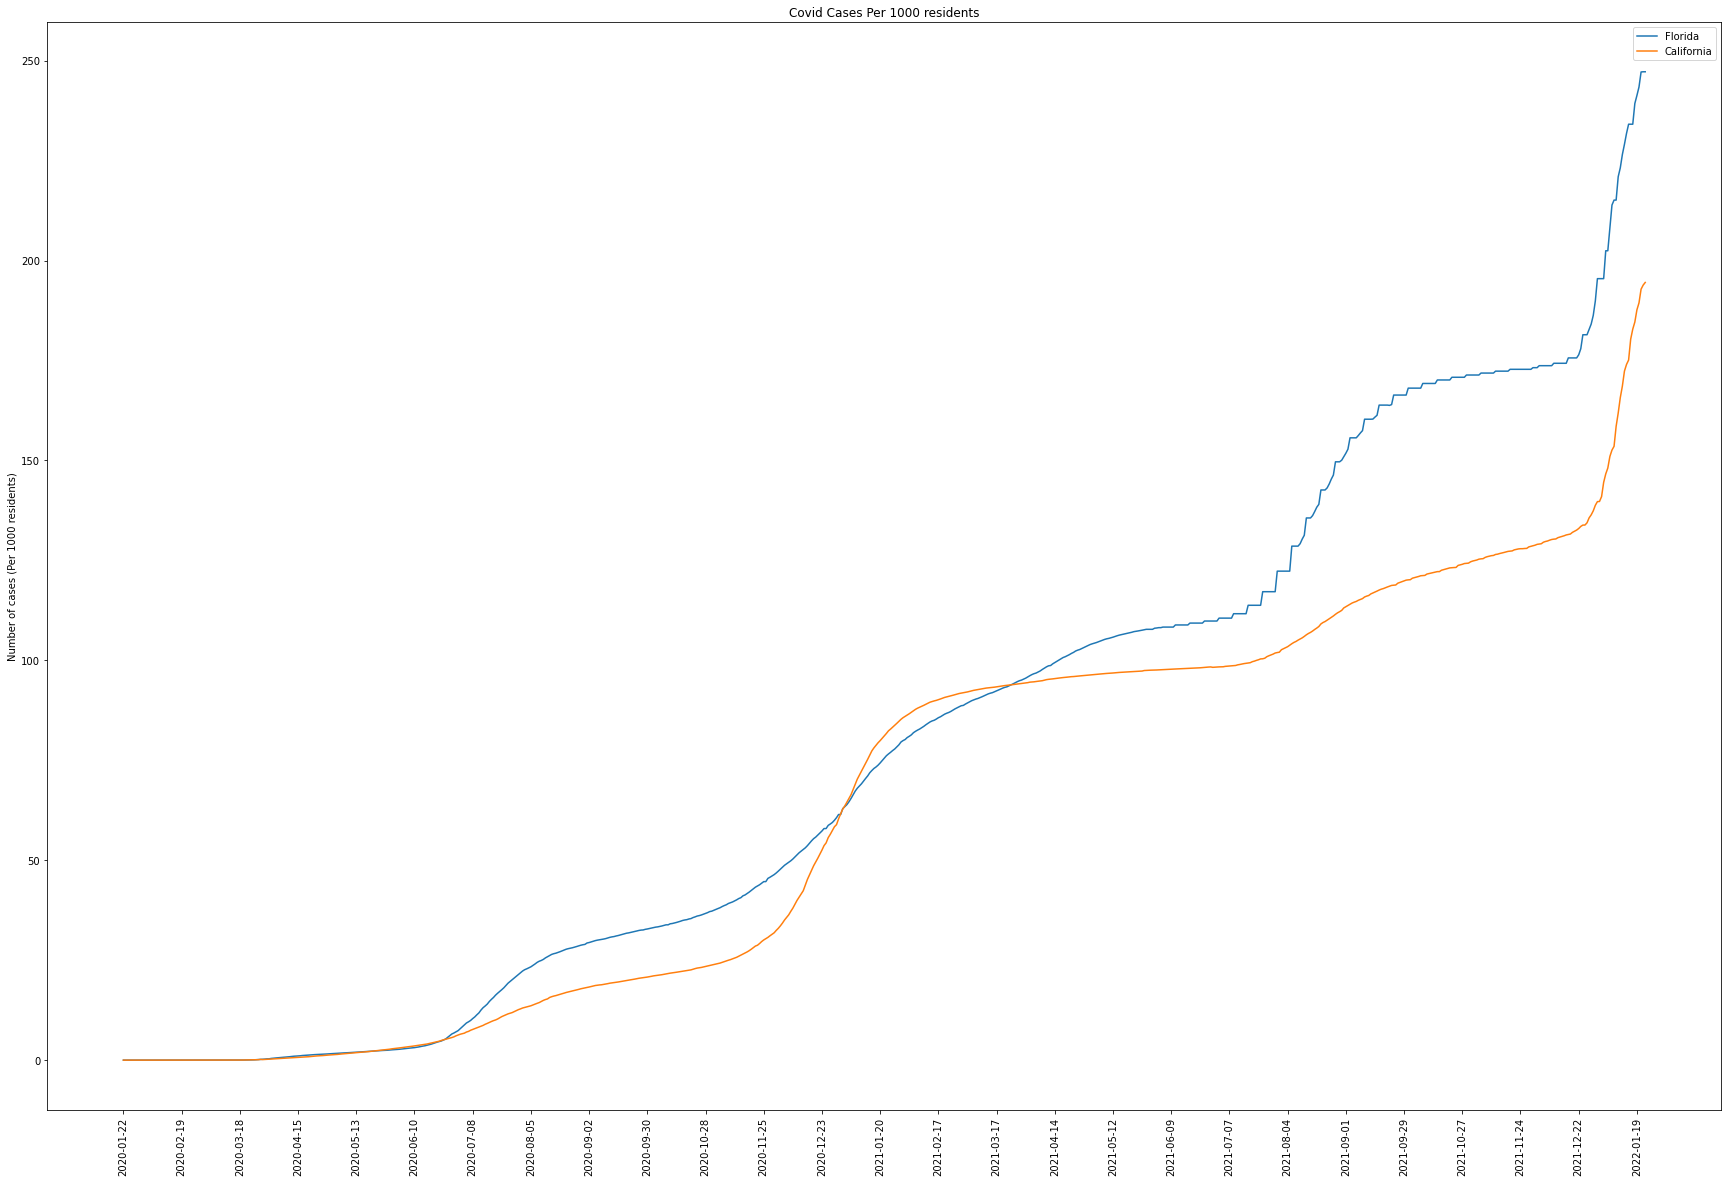

In [51]:
_= plt.figure(figsize=(30,20))
_= plt.title("Covid Cases Per 1000 residents")
_= plt.plot(Flor_per_Cap, label='Florida')
_= plt.plot(Cal_per_Cap, label='California')
_= plt.ylabel('Number of cases (Per 1000 residents)')
_= plt.xticks(range(0,len(dates),28) ,rotation=90)
_= plt.legend()
plt.show()

**This is total number of cases in each state.  We should look at current case loads too**

In [52]:
_.figure.savefig('./figures/CA_v_Fl_cases_per1K.png')

In [57]:
# What about deaths?
us_deaths = dfs['us_deaths'].copy()
# Gets the data from California & Florida only
Cal_deaths=us_deaths[us_deaths['Province/State']=='California']
Flor_deaths=us_deaths[us_deaths['Province/State']=='Florida']
# Indexes the data by Admin2 (aka cities) and Dates
#This unstacks the cities into their own hirerarchy
dframe7=Cal_deaths.set_index(['Admin2','Date']).unstack('Admin2')['Case']
dframe8=Flor_deaths.set_index(['Admin2','Date']).unstack('Admin2')['Case']

In [59]:
#If I'm going to do this a bunch might as well make a function to get the city data from the dataframe
def cities(dataframe):
    Cities=[]
    for i in dataframe.columns:
        Cities.append(dataframe[i])
    return DataFrame(Cities)  

In [60]:
Cal_Cities_Deaths=cities(dframe7)
Flor_Cities_Deaths=cities(dframe8)
Cal_deaths_per_1k = Cal_Cities_Deaths.div(39538.223)
Flor_deaths_per_1k = Flor_Cities_Deaths.div(21538.187)

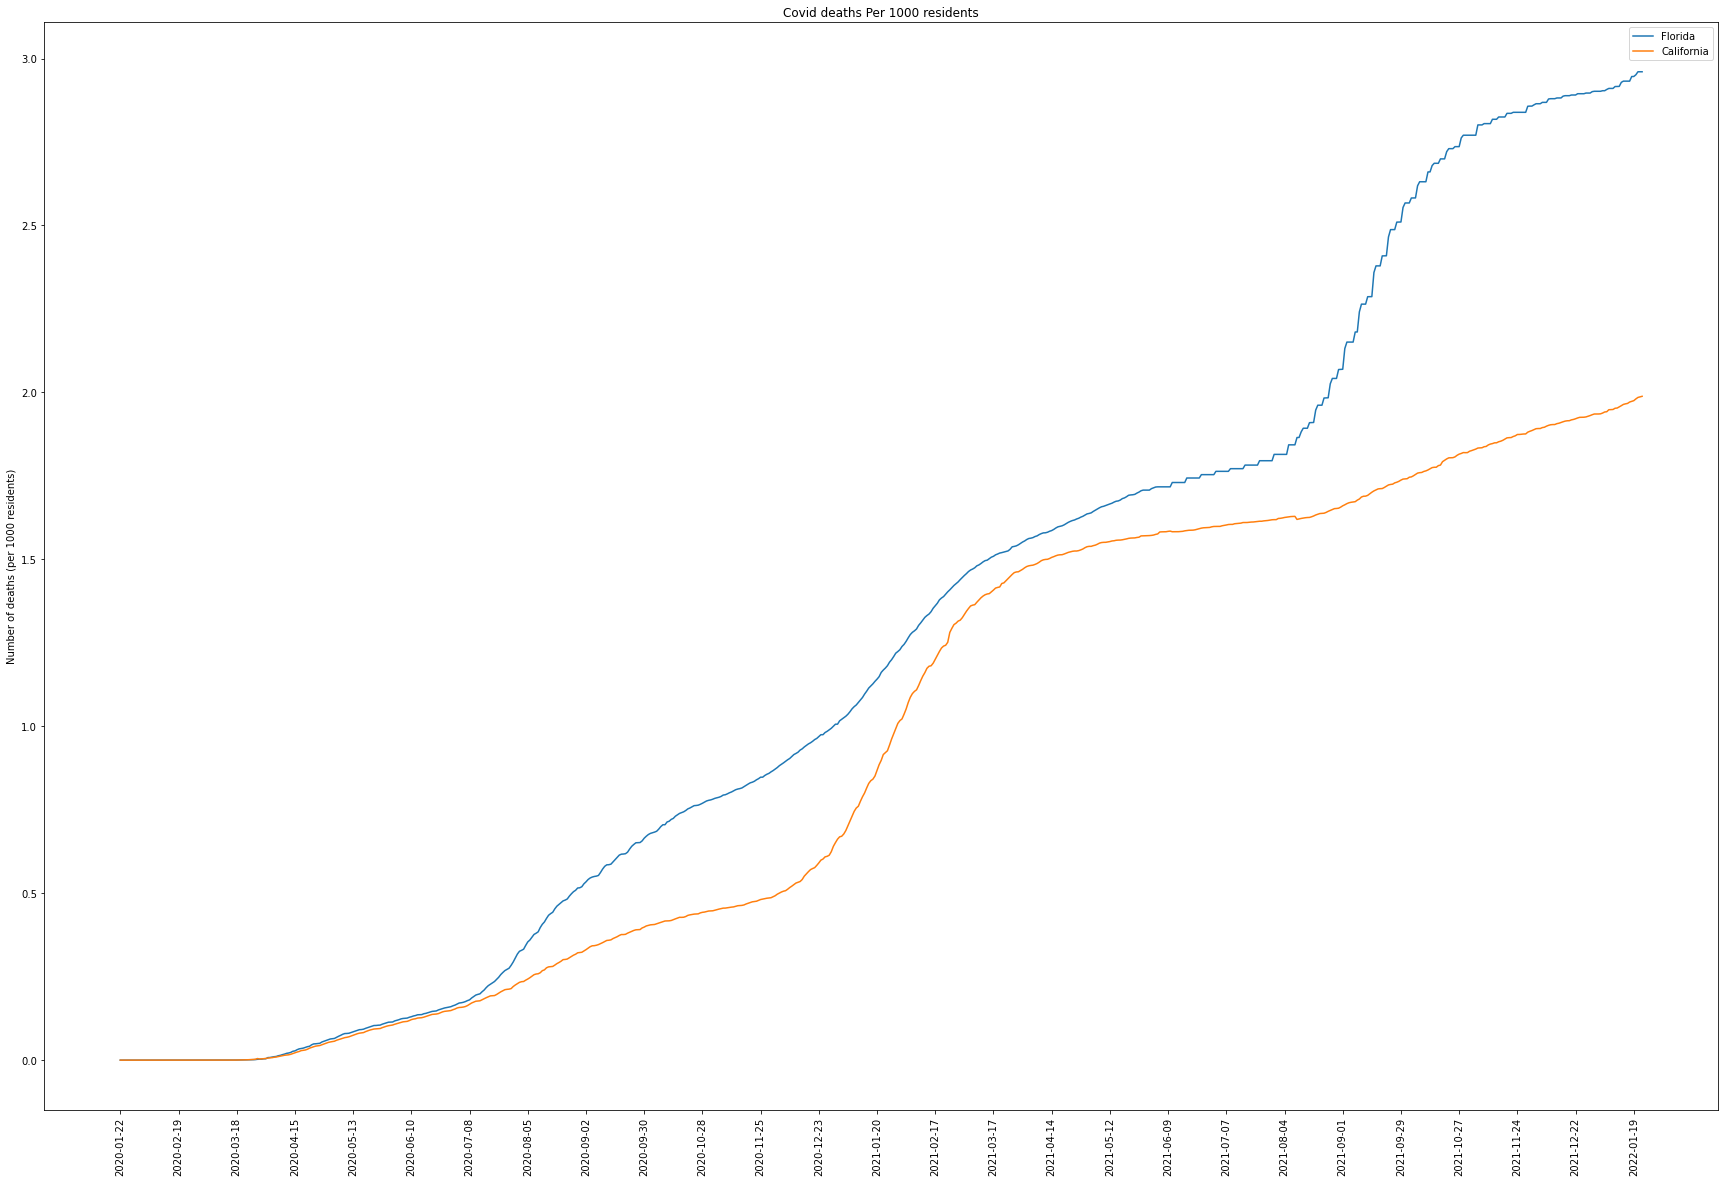

In [61]:
__= plt.figure(figsize=(30,20))
__= plt.title("Covid deaths Per 1000 residents")
__= plt.plot(Flor_deaths_per_1k.sum(), label='Florida')
__= plt.plot(Cal_deaths_per_1k.sum(), label='California')
__= plt.ylabel('Number of deaths (per 1000 residents)')
__= plt.xticks(range(0,len(dates),28) ,rotation=90)
__= plt.legend()
plt.show()

In [62]:
__.figure.savefig('./figures/CA_v_Fl_deaths_per1K.png')

In [63]:
# What about mortality rate?
simplified = dfs['us_simplified'] # This data only has the confirmed cases and deaths by state for each date
# Gets the data from California & Florida only
Cal_deaths=simplified[simplified['Province/State']=='California']
Flor_deaths=simplified[simplified['Province/State']=='Florida']
# make a new column of % deaths by cases
Cal_deaths['Mortality']=((Cal_deaths['Deaths']/Cal_deaths['Confirmed'])*100)
Flor_deaths['Mortality']=((Flor_deaths['Deaths']/Flor_deaths['Confirmed'])*100)

C:\Users\User\AppData\Local\Temp/ipykernel_26772/1232612305.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cal_deaths['Mortality']=((Cal_deaths['Deaths']/Cal_deaths['Confirmed'])*100)
C:\Users\User\AppData\Local\Temp/ipykernel_26772/1232612305.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Flor_deaths['Mortality']=((Flor_deaths['Deaths']/Flor_deaths['Confirmed'])*100)


In [64]:
Cal_deaths.describe()

,Unnamed: 0,Confirmed,Deaths,Mortality
count,43980.000000,4.398000e+04,43980.000000,3.964100e+04
mean,166390.500000,4.182800e+04,617.310277,inf
std,12696.076756,1.434515e+05,2435.907639,NaN
min,144401.000000,0.000000e+00,0.000000,0.000000e+00
25%,155395.750000,2.010000e+02,2.000000,6.889513e-01
50%,166390.500000,4.134500e+03,48.000000,1.137601e+00
75%,177385.250000,2.608300e+04,306.000000,1.499502e+00
max,188380.000000,2.494097e+06,28480.000000,inf


In [65]:
# The first time I did this I didn't do my calculations correctly.  This groups by dat and gets the sum to compare.
Flor_deaths.groupby('Date').fillna(0).sum()

Unnamed: 0                                              13957936998
Admin2            AlachuaAlachuaAlachuaAlachuaAlachuaAlachuaAlac...
Province/State    FloridaFloridaFloridaFloridaFloridaFloridaFlor...
Confirmed                                                1229501228
Deaths                                                     19411502
Country/Region    USUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUS...
Mortality                                                       inf
dtype: object

In [66]:
print("Overall Florida Mortality: ", round((19411502/1229501228)*100, 2), '%')

Overall Florida Mortality:  1.58 %


In [67]:
Cal_deaths.groupby('Date').fillna(0).sum()

Unnamed: 0                                               7317854190
Admin2            AlamedaAlamedaAlamedaAlamedaAlamedaAlamedaAlam...
Province/State    CaliforniaCaliforniaCaliforniaCaliforniaCalifo...
Confirmed                                                1839595402
Deaths                                                     27149306
Country/Region    USUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUS...
Mortality                                                       inf
dtype: object

In [68]:
print("Overall California Mortality: ", round((27149306/1839595402)*100,2), '%')

Overall California Mortality:  1.48 %


In [69]:
Flor_deaths.groupby('Date').fillna(0)

,Unnamed: 0,Admin2,Province/State,Confirmed,Deaths,Country/Region,Mortality
250686,250686,Alachua,Florida,0,0,US,0.000000
250687,250687,Alachua,Florida,0,0,US,0.000000
250688,250688,Alachua,Florida,0,0,US,0.000000
250689,250689,Alachua,Florida,0,0,US,0.000000
250690,250690,Alachua,Florida,0,0,US,0.000000
...,...,...,...,...,...,...,...
301258,301258,Washington,Florida,5346,75,US,1.402918
301259,301259,Washington,Florida,5346,75,US,1.402918
301260,301260,Washington,Florida,5346,75,US,1.402918
301261,301261,Washington,Florida,5831,87,US,1.492025


**not a very big difference. But things are looking better in Florida on that date**

Why then do the sums of the Mortality end up being so much higher in CA than Fl?

In [74]:
Flor_deaths['Mortality'][Flor_deaths["Date"]=='2022-01-23'].describe()

count    68.000000
mean      1.859214
std       2.350779
min       0.594118
25%       1.271703
50%       1.511954
75%       1.858013
max      20.432286
Name: Mortality, dtype: float64

In [75]:
Cal_deaths['Mortality'][Cal_deaths["Date"]=='2022-01-23'].describe()

count    59.000000
mean      0.893338
std       0.363525
min       0.000000
25%       0.689491
50%       0.854473
75%       1.104018
max       1.673750
Name: Mortality, dtype: float64

In [76]:
print ('Mortality Florida 2022-01-23','\nMean: ',Flor_deaths['Mortality'][Flor_deaths["Date"]=='2022-01-23'].mean(), '\nMax: ',Flor_deaths['Mortality'][Flor_deaths["Date"]=='2022-01-23'].max())
print('')
print ('Mortality California 2022-01-23','\nMean: ',Cal_deaths['Mortality'][Cal_deaths["Date"]=='2022-01-23'].mean(), '\nMax: ',Cal_deaths['Mortality'][Cal_deaths["Date"]=='2022-01-23'].max())

Mortality Florida 2022-01-23 
Mean:  1.8592135914565808 
Max:  20.432286389733196

Mortality California 2022-01-23 
Mean:  0.893338023441981 
Max:  1.6737495913697287


<font color='red'>This tells a much different story than I've heard on the radio that Florida is safer than California.  <br>The **opposite** is in fact true. </font>

In [77]:
import seaborn as sns

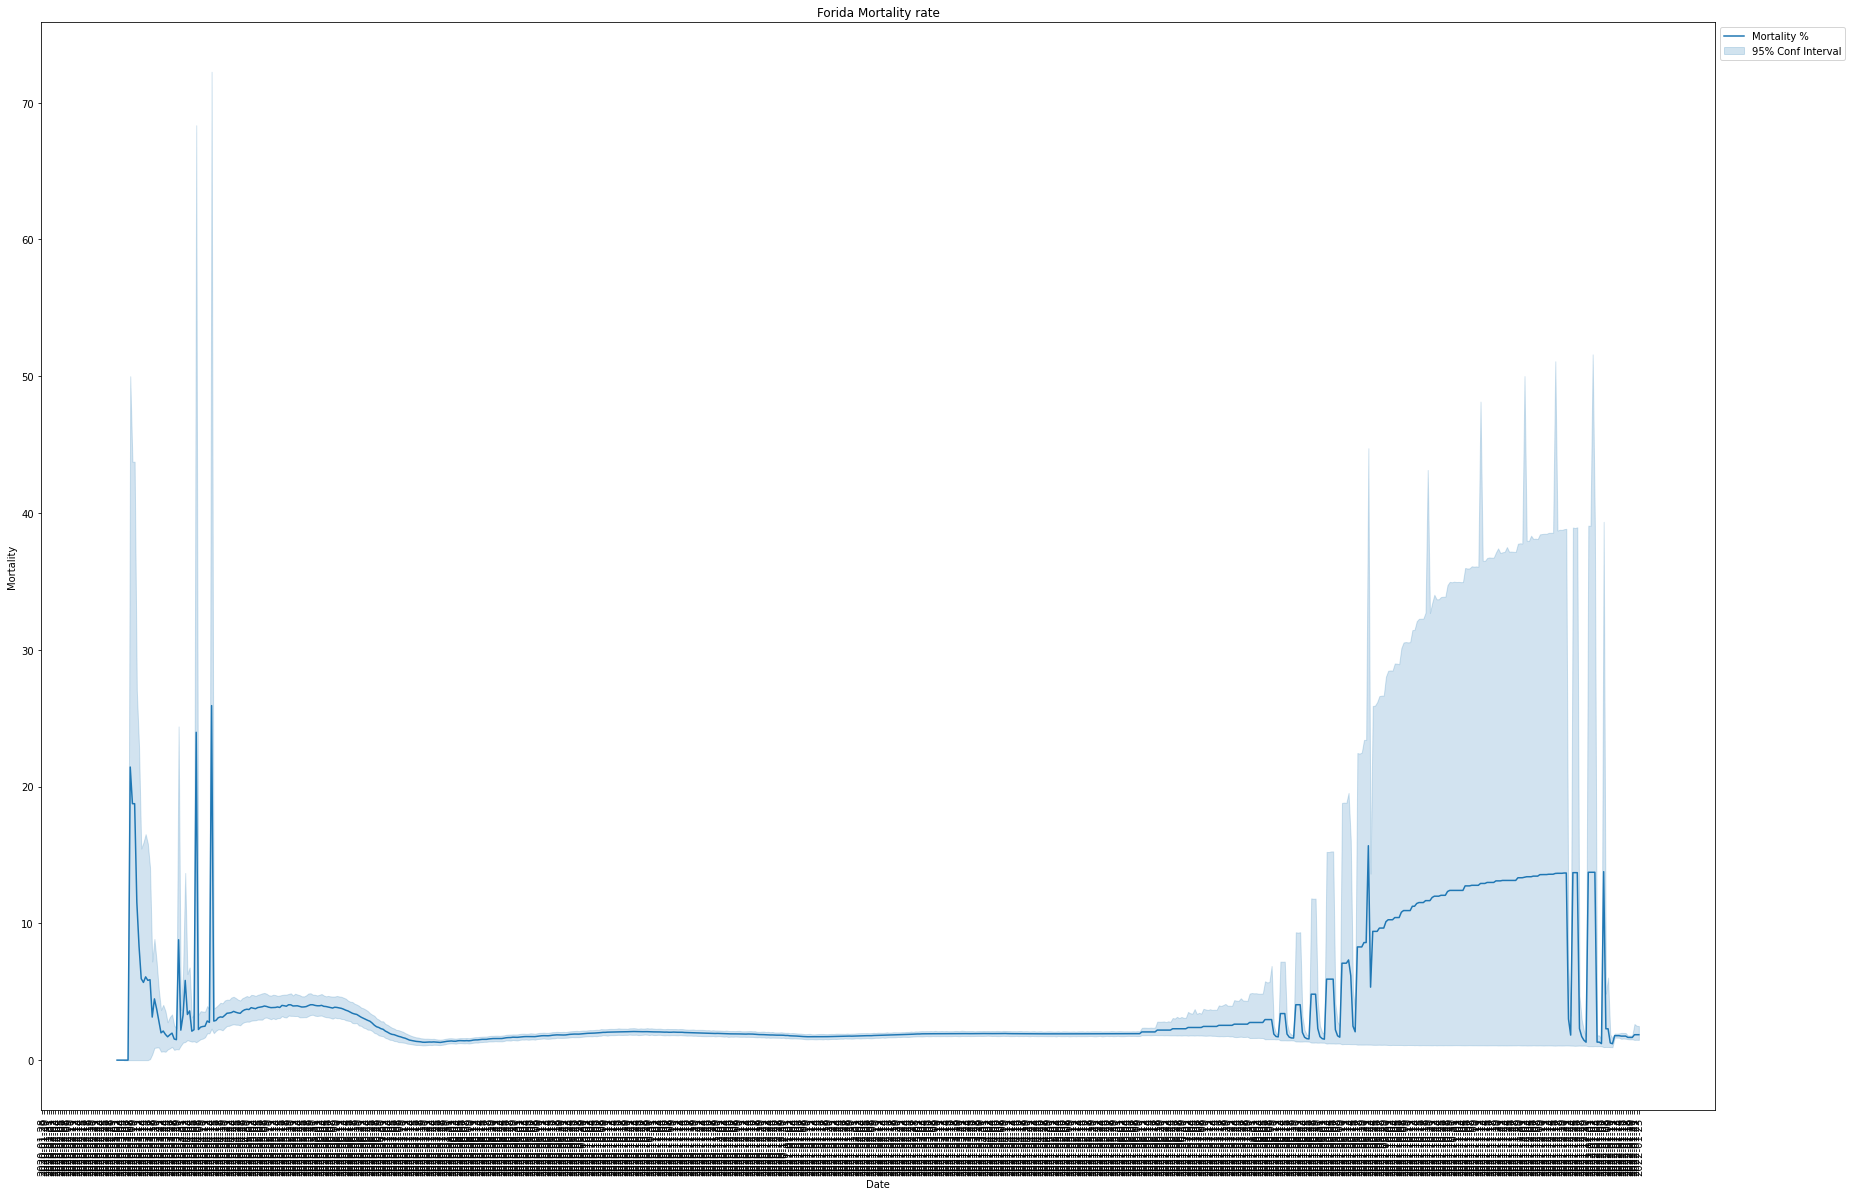

In [78]:
g= plt.figure(figsize=(30,20))
g=plt.title('Forida Mortality rate')
g=sns.lineplot(data=Flor_deaths,x='Date',y='Mortality')
g.legend(labels=["Mortality %","95% Conf Interval"], loc = 2, bbox_to_anchor = (1,1))
plt.xticks(rotation=90)
plt.show()

**Mortality rates in Florida have certainly gotten really high at times... 25%! at one point!**

And looking at max and mean above I now know why the 95% confidence interval is so high!

In [79]:
g.figure.savefig('./figures/Florida_Mortality.png')

In [80]:
from datetime import datetime

In [81]:
Cal_deaths['Date']=Cal_deaths['Date'].apply(lambda x: 
                                    datetime.strptime(x,'%Y-%m-%d'))

C:\Users\User\AppData\Local\Temp/ipykernel_26772/4040170841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cal_deaths['Date']=Cal_deaths['Date'].apply(lambda x:


In [82]:
Cal_deaths['Date']

144401   2020-01-22
144402   2020-01-23
144403   2020-01-24
144404   2020-01-25
144405   2020-01-26
            ...    
188376   2022-01-19
188377   2022-01-20
188378   2022-01-21
188379   2022-01-22
188380   2022-01-23
Name: Date, Length: 43980, dtype: datetime64[ns]

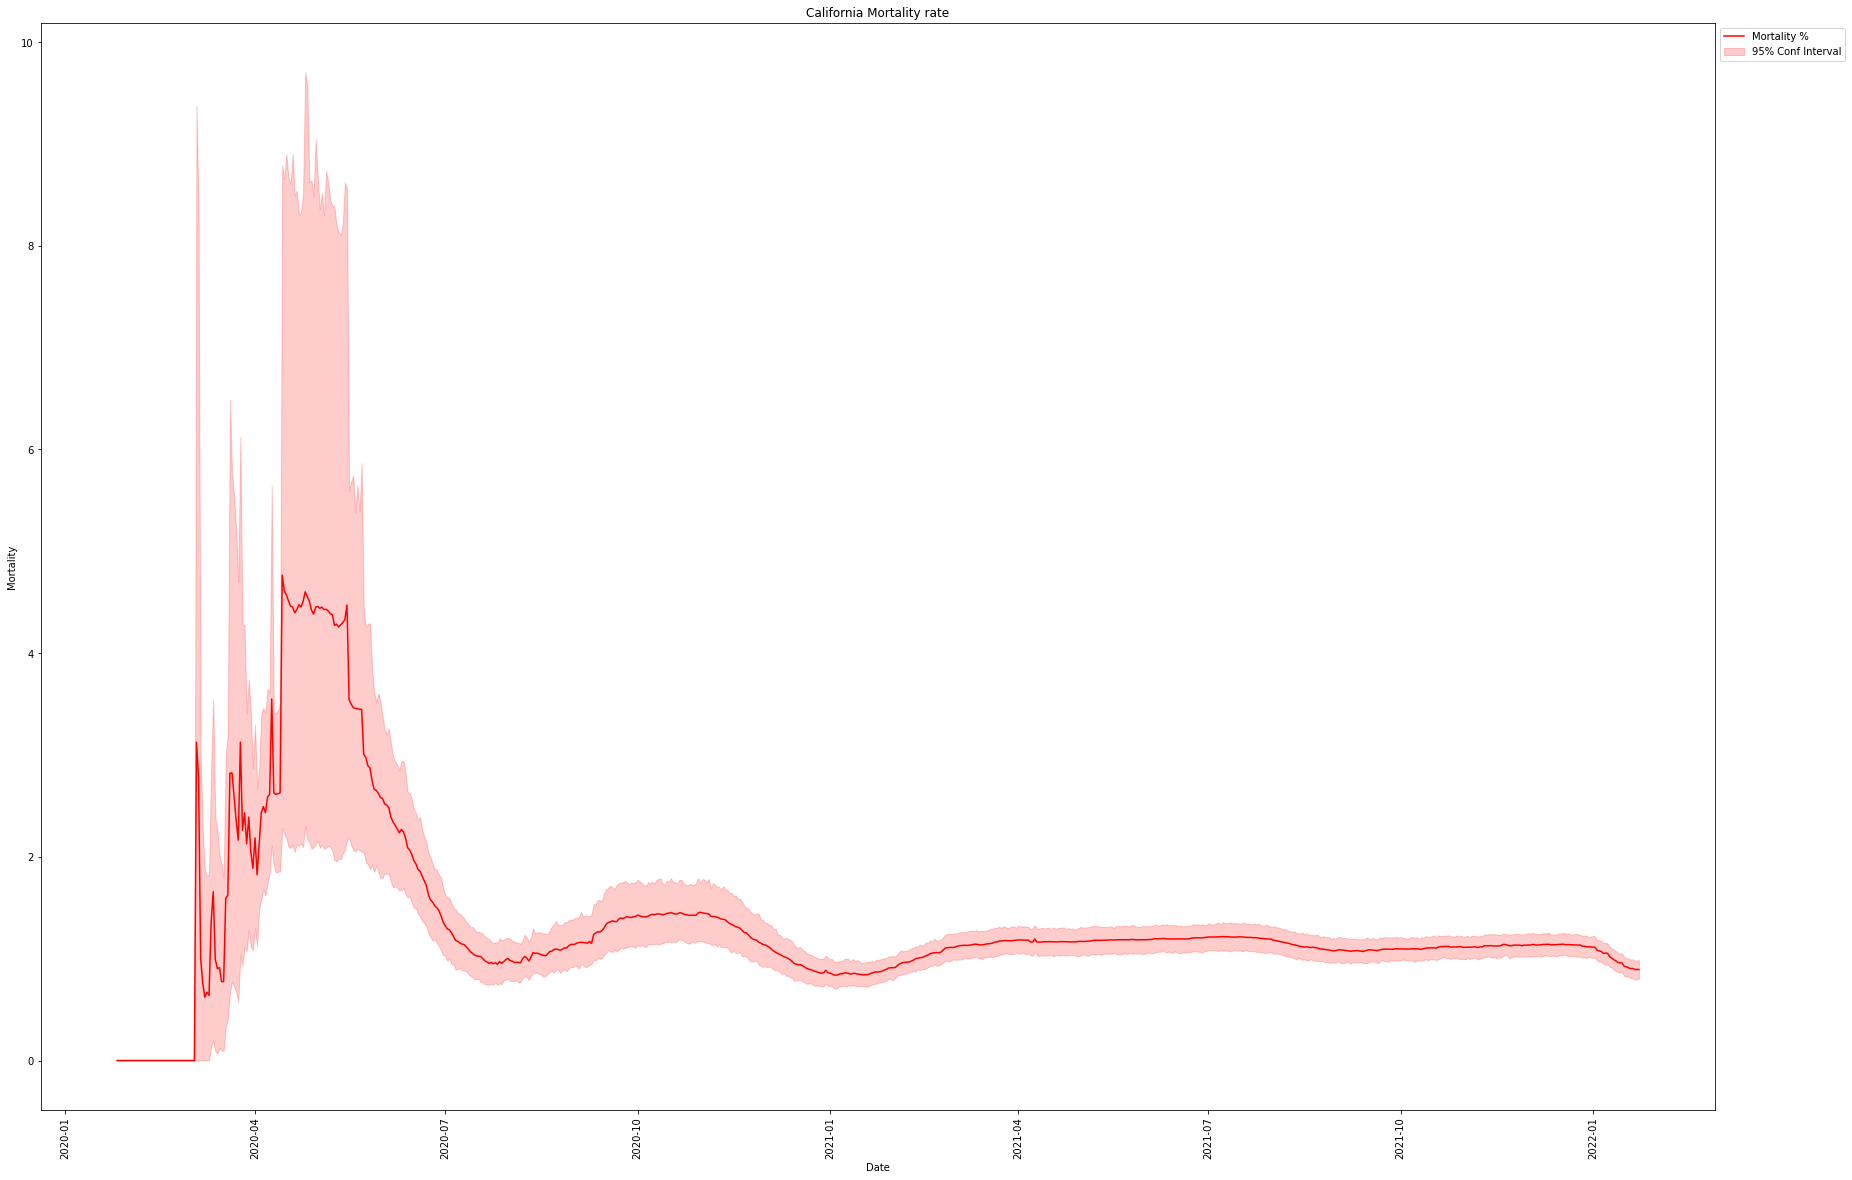

In [83]:
f= plt.figure(figsize=(30,20))
f=plt.title('California Mortality rate')
f=sns.lineplot(data=Cal_deaths,x='Date',y='Mortality', color='red')
f.legend(labels=["Mortality %","95% Conf Interval"], loc = 2, bbox_to_anchor = (1,1))
plt.xticks(rotation=90)
plt.show()

**California has had almost 9% mortality at times, but is below 2% for most of COVID**

The Omicron surge was really bad for Florida, but not as bad for California?  Maybe I should look at them together just to see if that is right since the scales are so different.

In [84]:
f.figure.savefig('California_Mortality.png')

In [85]:
print('Flor Deaths',len(Flor_deaths.Mortality),'Cal Deaths',len(Cal_deaths.Mortality), "\nDates",len(dates))

Flor Deaths 50577 Cal Deaths 43980 
Dates 733


In [86]:
# why do they have different amount of dates?
# Or is it they have a different amount of counties which are summed up?
Fl_Cty_coutn=len(Flor_deaths['Admin2'].unique())
Ca_Cty_count =len(Cal_deaths['Admin2'].unique())
print('No. of Florida Counties: ', Fl_Cty_coutn,'\nNo. of California Counties: ',Ca_Cty_count)

No. of Florida Counties:  69 
No. of California Counties:  60


In [87]:
#That would account for the different numbers of dates.  
Fl_dates=len(Flor_deaths.Mortality)
Ca_dates=len(Cal_deaths.Mortality)
print('No. of Fl Dates: ', Fl_dates/Fl_Cty_coutn,'\nNo. of CA Dates: ',Ca_dates/Ca_Cty_count)

No. of Fl Dates:  733.0 
No. of CA Dates:  733.0


In [93]:
h= plt.figure(figsize=(30,20))
h= plt.title('California vs. Florida Mortality rate')
h= sns.lineplot(data=Flor_deaths,x='Date',y='Mortality')
h= sns.lineplot(data=Cal_deaths,x='Date',y='Mortality')
h.legend(labels=["Florida Mortality %","95% Conf", "California Mortality %", "95% Conf"], loc = 2, bbox_to_anchor = (1,1))
plt.xticks(rotation=90)
plt.show()
#new_ticks = [i for i in dates]
#plt.xticks(range(0, len(new_ticks), 12), new_ticks[::12], rotation=90)
#plt.show()

TypeError: tzinfo argument must be None or of a tzinfo subclass, not type 'UnitData'

TypeError: tzinfo argument must be None or of a tzinfo subclass, not type 'UnitData'

In [196]:
h.figure.savefig('./figures/Cal_vs_Florida_deaths.png')

In [ ]:
# Next order of business is to do this for every state in the US


**This next section is to experiment with getting the population data frome each Country/State/County to compair two things**

**Covid cases by population of each count and covid cases by population density**

In [94]:
import webbrowser
website ='https://worldpopulationreview.com/'
webbrowser.open(website)

True

In [95]:
World_Population = pd.read_html('https://worldpopulationreview.com/')
World_Population

[                                 0             1
 0    World Population (as of null)           NaN
 1  Next UN Estimate (July 1, 2022)  7.953953e+09
 2                   Births per Day           NaN
 3                   Deaths per Day           NaN
 4               Net Change per Day           NaN
 5   Population Change Since Jan. 1           NaN,
      Flag           Country  2022 (Live)  2020 Population           Area  \
 0     NaN             China   1447089998       1439323776  9,706,961 km²   
 1     NaN             India   1402365724       1380004385  3,287,590 km²   
 2     NaN     United States    334188243        331002651  9,372,610 km²   
 3     NaN         Indonesia    278236948        273523615  1,904,569 km²   
 4     NaN          Pakistan    228107356        220892340    881,912 km²   
 ..    ...               ...          ...              ...            ...   
 227   NaN        Montserrat         4965             4992        102 km²   
 228   NaN  Falkland Islands     

In [96]:
# Okay I need to use my previous code to webscrape for these websites.  That way I 1) am showing that my webscrape class works
# and 2) I'll have this automated to grab the counties from the other states.

In [97]:
World_pop=pd.DataFrame(World_Population)
World_pop

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\internals\construction.py:540: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


,0
0,0 ...
1,Flag Country 2022 (Live) 2020...
2,Territory ...
3,Country 2021 Population 2011 Population ...
4,Year Population Growth Rate 0 -10000 ...
5,Year Population Growth Rate 0 2022 795...
6,Year Population Growth Rate 0 2025 8...


In [98]:
World_pop[0][0]

,0,1
0,World Population (as of null),NaN
1,"Next UN Estimate (July 1, 2022)",7.953953e+09
2,Births per Day,NaN
3,Deaths per Day,NaN
4,Net Change per Day,NaN
5,Population Change Since Jan. 1,NaN


In [99]:
CA_Population = pd.read_html('https://worldpopulationreview.com/states/california-population')
CA_Population

[                                         Race  Population Percentage
 0                                       White    23453222     59.70%
 1                                       Asian     5692423     14.49%
 2                             Some Other Race     5481792     13.95%
 3                   Black or African American     2274108      5.79%
 4                           Two or More Races     1922664      4.89%
 5           American Indian and Alaska Native      303998      0.77%
 6  Native Hawaiian and Other Pacific Islander      155290      0.40%,
          Type Owner Renter
 0      Female   41%    60%
 1  Non Family   42%    58%
 2        Male   45%    56%
 3         All   55%    45%
 4     Married   68%    32%,
          Type     Count  Average Size  Owned
 0         All  13044266             3     55
 1     Married   6491236             4     68
 2  Non Family   4085830             1     42
 3      Female   1690625             4     41
 4        Male    776575             4  

In [ ]:
# Wow! that is full of useful statistics we can use to look at risk factors for COVID, But it's not County Data
# This data appears to be a bit out of date.  It does include the 2020 census but it's projection from there.
# hopefully it'll be updated soon.

In [100]:
# I'm starting to like the panda's html parser.  It's making getting some data off a website very easy.
CA_Population_County = pd.read_html('https://worldpopulationreview.com/us-counties/states/ca')
CA_Population_County

[                      Name  2022 Population Growth Since 2010  Density (mi²)
 0       Los Angeles County          9934710             1.13%        2448.12
 1         San Diego County          3351737             8.01%         796.77
 2            Orange County          3174849             5.30%        4014.74
 3         Riverside County          2544817            15.59%         353.13
 4    San Bernardino County          2220081             8.78%         110.69
 5       Santa Clara County          1914397             7.19%        1483.78
 6           Alameda County          1685048            11.37%        2279.89
 7        Sacramento County          1591994            12.00%        1649.84
 8      Contra Costa County          1162547            10.45%        1608.52
 9            Fresno County          1020554             9.50%         171.27
 10             Kern County           919534             9.34%         113.08
 11    San Francisco County           884108             9.76%  

In [ ]:
# Making a data frame to hopefully merge with the COVID numbers data frame.  This way I can compare numbers vs population
# And I'll get practice doing data frame mergers.  Why is it located at [0][0] when it's the only data on that page?

In [ ]:
# Need to remove the ' County' from all the county names... or add ' County' to my Covid DataFrame